**_Notebook de Séries Temporais: Time Series with Python (DATACAMP)_**

**Curso 01: Manipulating Time Series Data in Python**


Capítulo 01: Working with Time Series in Pandas

Séries Temporais com Python e Pandas utilizam objetos específicos para pontos no tempo ou períodos de tempo, com métodos e atributos específicos que refletem
os detalhes específicos relacionados ao tempo. Colocar datas e tempos no index de um Data Frame converte os dados em uma Time Series. A seguir são utilizados 
o Módulo Pandas e o atributo pd.Timestamp





In [3]:
import pandas as pd 
from datetime import datetime

# Manualmente Cria uma data-hora 

time_stamp = pd.Timestamp(datetime(2017,1,1))

print(time_stamp)

# Manualmente Cria uma data-hora com uma String

time_stamp_2 = pd.Timestamp('2017-01-01')

print(time_stamp_2)

# Confirmando que as duas são iguais

print("The two dates are the same? Answer = " + str(time_stamp == time_stamp_2)) # Converte-se boolean em strings usando str( ... )


2017-01-01 00:00:00
2017-01-01 00:00:00
The two dates are the same? Answer = True


In [4]:
# Objetos do Tipo Timestamp possuem atributos que contém informações acerca do dia/data armazenado 

print(type(time_stamp))

print(time_stamp.year)
print(time_stamp.day_name())


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017
Sunday


In [5]:
# Objetos do tipo Period possuem um atributo que armazena a frequência (por padrão os Meses ou 'M')

periodo = pd.Period('2017-01')
print(periodo.freq)

# Mudando a frequência para Dias ou 'D' com o método .asfreq()

periodo.asfreq('D')
print(periodo.asfreq('D').freq)

# Criando um TimeStamp com Frequência

pd.Timestamp('2017-01-01', freq= 'M')




<MonthEnd>
<Day>


C:\Users\User\AppData\Local\Temp\ipykernel_20772\4226881772.py:13: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2017-01-01', freq= 'M')


Timestamp('2017-01-01 00:00:00', freq='M')

In [6]:
# Criando uma Sequência de TimeStamps com date_range()
# Pode-se especificar a data de início e final ou a data de início, o número de períodos e a frequência

index = pd.date_range(start='2017-01-01', periods = 12, freq = 'M')

print(index,"\n")


# Cria-se uma Data Series quando se coloca um Datetimeindex como index de um data frame

pd.DataFrame({'data':index}).info()


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [7]:
# Time Series Aleatória: 

Index_Time_Series = pd.date_range(start = '2022-01-01', freq = 'M', periods = 12)

import numpy as np 

Dados = np.random.random(size = (12,2))
Time_Series = pd.DataFrame(data = Dados, index = index).info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [8]:
# Create the range of dates here
seven_days = pd.date_range(start = '2017-1-1', periods = 7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


Transformações de Time Series são peça fundamental para sua aplicação em Python. Dentre as transformações mais utilizadas, citamos: 

* Transformando Datas em String para o tipo datetime64
* Selecionando períodos específicos 
* Alterando e mudando a frequência do DateTimeIndex 
    * Upsampling (Maior Frequência, necessitando mais dados)
    * Downsampling (Menor Frequência, agregam-se dados)




In [9]:
# Carregando os Dados das ações da Google (2 Anos)

Dados_Google = pd.read_csv('google.csv')
Dados_Google.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [10]:
# Nota-se que temos duas colunas: "Date" e "Close"
# Devemos Converter a coluna para o tipo datetime64, portanto: 

Dados_Google.Date = pd.to_datetime(Dados_Google.Date)
Dados_Google.info()

# Coluna "Date" reformatada corretamente 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [11]:
# Definindo a Coluna "Date como o Index do Data Frame"

Dados_Google.set_index('Date', inplace = True)
Dados_Google.info()

# Nota-se que agora o RangeIndex foi substituído por DatetimeIndex


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


Colocar os dados de tempo nos índices do Data Frame Facilita a plotagem da Time Serie com os métodos ordinários do Módulo Pandas e Matplotlib.pyplot



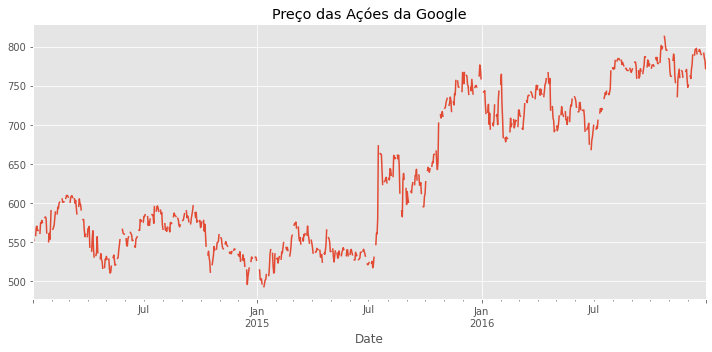

In [12]:
import matplotlib.pyplot as plt

Dados_Google.Close.plot(title = "Preço das Açóes da Google")
plt.tight_layout()
plt.show()

# Nota importante: Quando o seu Data Frame possui múltiplas Time Series 
# (ou seja, múltiplas colunas para um mesmo dia), pode-se utilizar .plot(subplots = True) 
# de forma a auxiliar na visualização de múltiplos gráficos


A indexação do Data Frame pelas datas da Time Series Facilita a filtragem dos dados. Por exemplo, para selecionar os dados referentes somente ao ano de 2016 das ações da Google, 
Utilizamos: 


In [13]:
# De Acordo com as recomendações do Módulo Pandas: 

# Dados em 2016
Dados_Google.loc['2016'].info()

Dados_Google_2016 = Dados_Google.loc['2016'].copy()

print('\n')

# Dados entre Jan/2016 e Mai/2016
Dados_Google.loc['2016-1':'2016-5'].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-01 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2016-01-01 to 2016-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   103 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


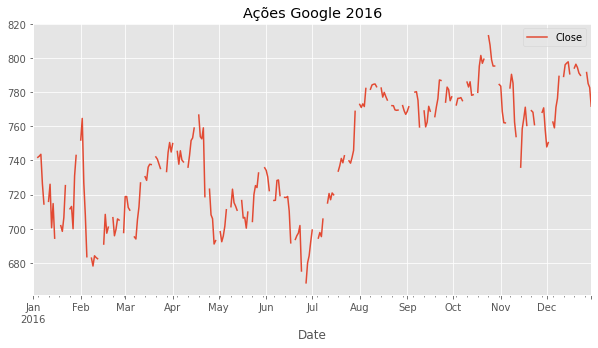

719.41

In [14]:
# Plotando os Dados de 2016

Dados_Google_2016.plot(title = "Ações Google 2016")
plt.show()

# Encontrando o peço das ações em uma data específica 

Dados_Google.loc['2016-6-10','Close']

Podemos alterar a frequência do index da Time Series para diário através de .asfreq('D') mas, infelizmente, não temos dados para todos os dias, resultaoo em valores 'NaN' para os preços das ações (já que neste dia, fins de semanas ou feriados, a bolsa de valores não tem pregões de ações). Trata-se de um exemplo de "Upsampling".

In [15]:
# Copiando o Data Frame
Dados_Google_Diarios = Dados_Google.copy()

# Alterando a frequência do Index e Printando os 5 primeiros resultados
print(Dados_Google_Diarios.asfreq('D').head())
print('\n')

# identificando os dias da Semana
print(pd.Timestamp('2014-01-04').day_name())
print(pd.Timestamp('2014-01-05').day_name())


             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10


Saturday
Sunday


In [16]:
# Outra forma de visualizar os dias da semana seria: 

# Copiando o Data Frame
Dados_Google_Diarios = Dados_Google.copy()

# Alterando a frequência do Index 
Dados_Google_Diarios.asfreq('D')

# Determinando o dia da Semana e Printando head()
Dados_Google_Diarios['Dia_Semana'] = Dados_Google_Diarios.index.day_name()
Dados_Google_Diarios.head()


,Close,Dia_Semana
Date,,
2014-01-02,556.00,Thursday
2014-01-03,551.95,Friday
2014-01-04,NaN,Saturday
2014-01-05,NaN,Sunday
2014-01-06,558.10,Monday


Uma observação importante é que podemos ajustar a frequência da Time Series Mediante .asfreq('B'), que resultará em uma frequência de 'Business Days'. 

Para selecionar as observações que não possuem valores: 
(Nota-se que apenas fins de Semana e feriados são mostrados)

In [17]:
Dados_Google_Diarios[Dados_Google_Diarios.Close.isnull()].head(7)

,Close,Dia_Semana
Date,,
2014-01-04,NaN,Saturday
2014-01-05,NaN,Sunday
2014-01-11,NaN,Saturday
2014-01-12,NaN,Sunday
2014-01-18,NaN,Saturday
2014-01-19,NaN,Sunday
2014-01-20,NaN,Monday


Um exemplo para se comparar os preços de ações ao longo dos anos é plotar os anos de forma individual, ou seja, levando como exemplo os dados da Yahoo: 

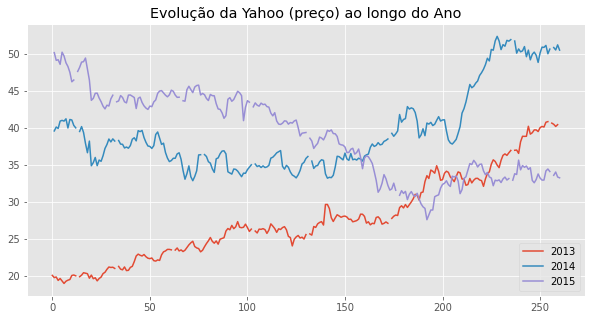

In [18]:
# Carregando os Dados da yahoo, alterando a coluna "date" para o tipo correto e substituindo
# o index corretamente 
yahoo = pd.read_csv('yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace= True)
yahoo.asfreq('D')

# Data Frame Vazio
prices = pd.DataFrame()

# Criando uma coluna para cada Ano
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plotando as 3 curvas de ano

plt.style.use('ggplot')
prices.plot(title = 'Evolução da Yahoo (preço) ao longo do Ano')
plt.show()


Com estes fundamentos consolidados, prosseguimos para a manipulação em si dos dados. Podemos acelerar o processo de introdução de dados utilizando argumentos dentro de pd.read_csv(...). 

In [19]:
# Argumentos "Parse_Dates" e "Index_Col" facilitam a tradução do .csv para Time Series

Google = pd.read_csv('google.csv', parse_dates=['Date'], index_col = 'Date')
print(Google.head())

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10


In [20]:
# Para mover as observações de uma série temporal utilizamos .shift()
# O padrão move as observações 1 passo no futuro (periods = 1)

Google['CloseShifted'] = Google.Close.shift()
Google.head(7)


,Close,CloseShifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86


Para Calcularmos a variação percentual de uma série temporal, devemos utilizar uma divisão entre seu valor atual pelo seu valor anterior com o método .div(..).

In [21]:

# Importrando os Dados Novamente
Google = pd.read_csv('google.csv', parse_dates=['Date'], index_col = 'Date')

# Filtrando somente os dias de Semana
Google = Google[Google.Close.isnull() == False]

# Realizando um Lag de 1 
Google['CloseShifted'] = Google.Close.shift()

#  Calculando a Mudança e printando o resultado
Google['Mudanca'] = Google.Close.div(Google.CloseShifted).sub(1).mul(100)
Google.head(7)

# Nota, podemos também calcular a variação percentual de uma Time Series mediante o método .pct_change().mul(100)
# Podemos também especificar periods = n para calcular a variação percentual em relação a n períodos atrás

,Close,CloseShifted,Mudanca
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,556.00,-0.728417
2014-01-06,558.10,551.95,1.114231
2014-01-07,568.86,558.10,1.927970
2014-01-08,570.04,568.86,0.207432
2014-01-09,564.55,570.04,-0.963090
2014-01-10,564.52,564.55,-0.005314


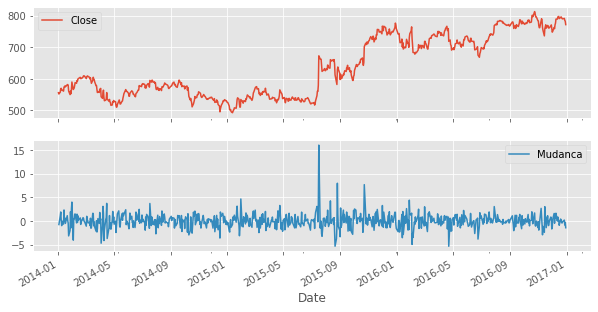

In [22]:
# Plotando a ação e sua variação 

Google[['Close','Mudanca']].plot(subplots = True)
plt.show()


In [23]:
# Podemos também facilmente calcular a diferença entre observações via .diff(...), ou seja X(t) - X(t-1)

Google['Diff'] = Google.Close.diff()
Google.head(7)

,Close,CloseShifted,Mudanca,Diff
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,-0.728417,-4.05
2014-01-06,558.10,551.95,1.114231,6.15
2014-01-07,568.86,558.10,1.927970,10.76
2014-01-08,570.04,568.86,0.207432,1.18
2014-01-09,564.55,570.04,-0.963090,-5.49
2014-01-10,564.52,564.55,-0.005314,-0.03


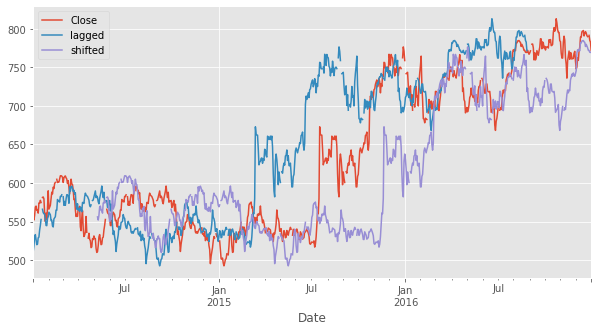

In [24]:
# O seguinte código demostra a diferença entre "Lagged" e "Shifted"

google = pd.read_csv('google.csv', parse_dates = ['Date'], index_col = 'Date')
google = google.asfreq('B')
google['lagged'] = google.Close.shift(periods = -90)
google['shifted'] = google.Close.shift(periods = 90)
google.plot()
plt.show()



Capítulo 02: Basic Time Series Metrics & Resampling

Comparar a taxa de crescimento de Séries Temporais é importante em inúmeros contextos. Para Normalizar as Séries temporais em escalas diferentes, geralmente se prossegue pela divisão da série pela sua primeira observação, que se transforma em 1. A Multiplicação da série transformada por 100 resulta na mudança percentual da série em relação ao início. 

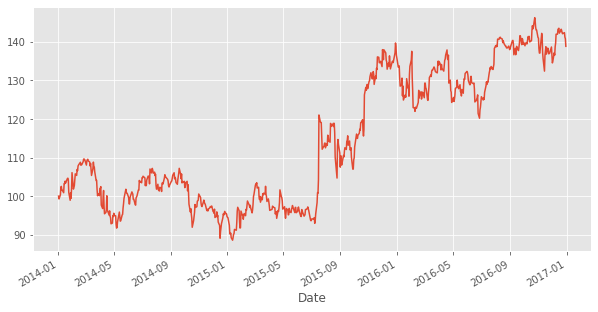

In [25]:
# Exemplificando: 

google = pd.read_csv('google.csv', parse_dates = ['Date'], index_col = 'Date')
google = google[google.Close.isnull() == False]
primeiro_preco = google.Close.iloc[0] # Seleciona a primeira observação da coluna "Close"
preco_normalizado = google.Close.div(primeiro_preco).mul(100)
preco_normalizado.plot()
plt.show()


Uma nota Importante: Quando temos duas séries temporais de mesmo índice, podemos concatenar suas colunas usando pd.concat([Serie_1,Serie_2], axis = 1)

Mudando a frequência de uma Série: Reamostragem
Trata-se de uma operação comum na análise de séries temporais, uma vez que muitas vezes necessitamos de analisar séries temporais de fontes distintas em uma frequência em comum. Quando se aumentam as frequências de uma série temporal, um problema de *upsampling* surge, ou seja, novas observações são necessárias para os novos pontos (exemplo: Uma série de dados coletados a cada 6 horas foi transformada em uma série de dados coletados a cada hora). Essas informações são preenchidas por metodologias de *fill* ou *interpolação*. Quando a frequência das observações é reduzida, surge um problema de *downsampling*, onde múltiplas observações devem ser *condensadas ou agregadas* para representar o período descrito (exemplo: uma série que coletada dados a cada dia é transformada de forma a ser uma série de dados semanais). 

- Upsampling: Aumenta o número total de pontos/observações
- Downsampling: Diminui o número total de pontos/observações 


In [26]:
# Série Temporal aleatória trimestral 

Dates = pd.date_range(start = '01-01-2022', freq = 'Q', periods = 4)
Dados = range(1,5)
Serie_Trimestral = pd.Series(data = Dados, index = Dates)
print(Serie_Trimestral)

2022-03-31    1
2022-06-30    2
2022-09-30    3
2022-12-31    4
Freq: Q-DEC, dtype: int64


In [27]:
# Exemplo de UpSampling: Série Trimestral se Torna Mensal 

Serie_Mensal = Serie_Trimestral.asfreq('M')
print(Serie_Mensal)

# Nota-se a presença de NaNs representando os dados que não existiam na série inicial 
# Transformando um objeto Series em Data Frame: 

Serie_Mensal = Serie_Mensal.to_frame('baseline')


2022-03-31    1.0
2022-04-30    NaN
2022-05-31    NaN
2022-06-30    2.0
2022-07-31    NaN
2022-08-31    NaN
2022-09-30    3.0
2022-10-31    NaN
2022-11-30    NaN
2022-12-31    4.0
Freq: M, dtype: float64


In [28]:
# Métodos de Upsampling: 

# Método 'bfill' utiliza a observação anterior 
# Método 'ffill' utiliza a última observação 
# Método 'fill_value = n' inputa 'n' em todas as instâncias de NaN

Serie_Mensal['bfill'] = Serie_Trimestral.asfreq('M', method = 'bfill')
Serie_Mensal['ffill'] = Serie_Trimestral.asfreq('M', method = 'ffill')
Serie_Mensal['filled_input'] = Serie_Trimestral.asfreq('M', fill_value = 2)

print(Serie_Mensal)


            baseline  bfill  ffill  filled_input
2022-03-31       1.0      1      1             1
2022-04-30       NaN      2      1             2
2022-05-31       NaN      2      1             2
2022-06-30       2.0      2      2             2
2022-07-31       NaN      3      2             2
2022-08-31       NaN      3      2             2
2022-09-30       3.0      3      3             3
2022-10-31       NaN      4      3             2
2022-11-30       NaN      4      3             2
2022-12-31       4.0      4      4             4


In [29]:
# O método .resample() é de grande uso para as transformações de frequência
# .resamople() funciona com a mesma lógica que .groupby()

Unrate = pd.read_csv('unrate.csv', parse_dates = ['DATE'], index_col= 'DATE' )
Unrate.head()

# Observa-se que os dados são dispostos no início de cada mês
# M - Fim do Mês 
# MS - Início do Mês
# BM - Fim do Mês (Dias úteis/Business Days)
# BMS - Início do Mês (Dias úteis/Business Days)


,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [30]:
Unrate.asfreq('MS').info()

Unrate.resample('MS') # Cria um objeto do tipo 'Resampler' 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [31]:
# Um exemplo que podemos construir com o PIB americano: 
# As informações estão avaliadas em Trimestres e devemos converter em meses (MS)

# Método utilizando .asfreq()
Crescimento_PIB = pd.read_csv('gdp_growth.csv',parse_dates = ['date'], index_col = 'date')
Crescimento_PIB = Crescimento_PIB.asfreq('MS', method = 'ffill')
Crescimento_PIB.head()

,gdp_growth
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


In [32]:
# Método utilizando .resample() e .ffill()

Crescimento_PIB_2 = pd.read_csv('gdp_growth.csv', parse_dates = ['date'], index_col = 'date')
Crescimento_PIB_2 = Crescimento_PIB_2.resample('MS').ffill()
Crescimento_PIB_2.head()


,gdp_growth
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


In [33]:
# Método utilizando .resample() e interpolate()

Crescimento_PIB_3 = pd.read_csv('gdp_growth.csv', parse_dates = ['date'], index_col = 'date')
Crescimento_PIB_3 = Crescimento_PIB_2.resample('MS').interpolate()
Crescimento_PIB_3.head(5)


,gdp_growth
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


Como já falado, uma habilidade importante é a de concatenar duas séries temporais com frequências distintas. Uma segunda habilidade de interesse é, após concatenados, permitir a interpolação dos dados não disponíveis em cada uma das séries. 

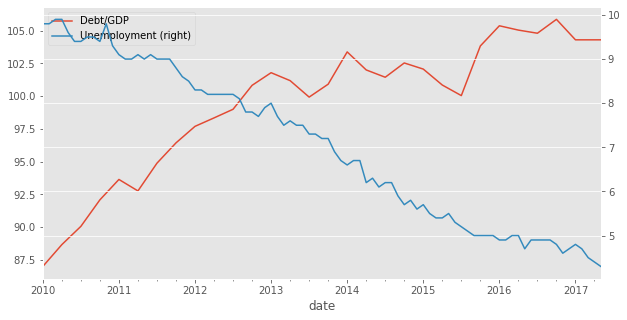

In [34]:
data = pd.read_csv('debt_unemployment.csv', parse_dates = ['date'], index_col = 'date')

# Interpola os dados faltantes e plota ambas as séries
interpolated = data.interpolate()
interpolated.plot(secondary_y = 'Unemployment')
plt.show()


No caso de Downsampling, devemos escolher como agregar os dados contidos no período sumarizado. Podemos utilizar a média, mediana, o último valor e etc. 

Vamios utilizar o Crescimento do PIB americano como exemplo. 

In [35]:
# Dado em uma frequência de Meses
Crescimento_PIB.head()

,gdp_growth
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


            gdp_growth
date                  
2007-12-31       1.850
2008-12-31      -2.700
2009-12-31      -0.175
2010-12-31       2.700
2011-12-31       1.700


<AxesSubplot:xlabel='date'>

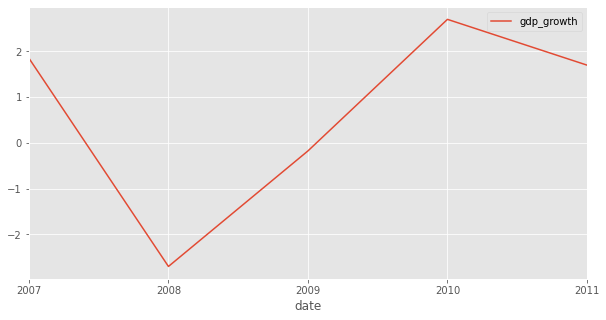

In [36]:
# Colocando em função de Anos pela média

print(Crescimento_PIB.resample('Y').mean().head())
Crescimento_PIB.resample('Y').mean().head().plot()


           gdp_growth            
                 mean median  max
date                             
2007-12-31      1.850   2.05  3.1
2008-12-31     -2.700  -2.30  2.0
2009-12-31     -0.175   0.40  3.9
2010-12-31      2.700   2.60  3.9
2011-12-31      1.700   1.85  4.6


<AxesSubplot:xlabel='date'>

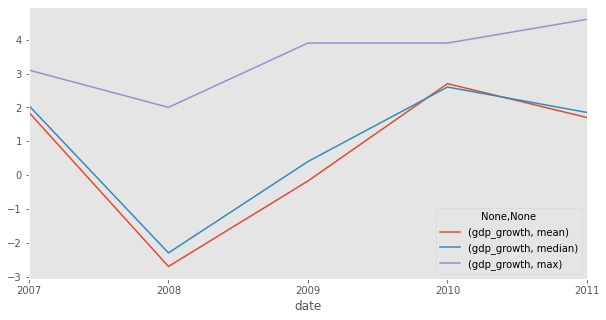

In [37]:
# Outras inúmeras formas poodem ser utilizadas, mas podemos especificar 
# inúmeras delas pelo método .agg([... , ...])

print(Crescimento_PIB.resample('Y').agg(['mean','median','max']).head())
Crescimento_PIB.resample('Y').agg(['mean','median','max']).head().plot(
    secondary_y = 'max')

# Nota: 'A' ou 'Y' para anual 

Podemos utilizar *Downsampling* como uma forma de visualizar de forma mais dinâmica certas séries temporais. Vamos tentar utilizar estes métodos para a interpretação de dados dos níveis de ozônio na atmosfera de Nova Iorque. 

<AxesSubplot:xlabel='date'>

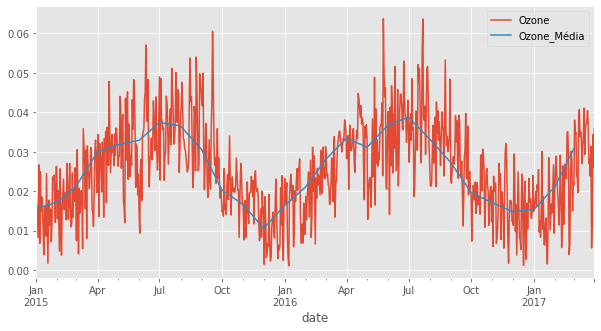

In [38]:
# Carregando os Dados
Ozone = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col = 'date')

# Filtrando a partir de 2015
Ozone = Ozone.loc['2015':]
ax = Ozone.plot()
Ozone_Mensal = Ozone.resample('M').mean().add_suffix('_Média')
Ozone_Mensal.plot(ax = ax)


Capítulo 3: Rolling Window Functions with Pandas

Window Functions ou funções janelas são funções que operam dentro de períodos dentro de sua Série Temporal (geralmente para se calcularem métricas). Dois tipos de Janelas Existem: As Rowling Windows (que possuem o mesmo número de observações para computar sua métrica) e as Expanding windows (cujo número de observações utilizadas só cresce ao longo da Série Temporal)

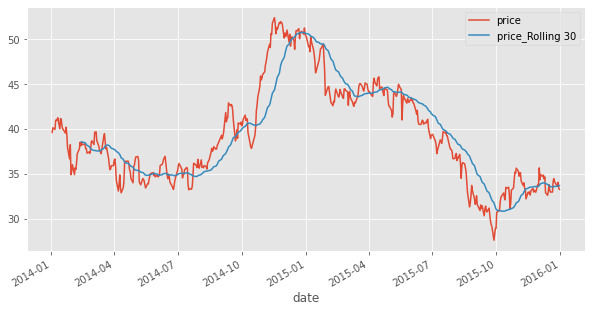

In [39]:
# Uma forma bem simples para definir uma Rowling Window é via .rolling(window = n)

# Dados das ações da Yahoo
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')

# Ajuste da Frequência para Business Days
yahoo = yahoo.asfreq('B').loc['2014':'2015']
# Filtrando Quaisquer Dados Faltantes
yahoo = yahoo[yahoo.price.isnull() == False]

# Rolling Window para os três últimas observações + plot comparando a série original 
ax = yahoo.plot()
yahoo.rolling(window=30).mean().add_suffix('_Rolling 30').plot(ax = ax)
plt.show()


O post Abaixo ilustra uma dúvida recorrente que advém do uso de pandas.

&nbsp;

![alt text](Cap1.png "Post Interessante")

Uma nota importante antes de prosseguir: 

Ao invés de especificar um número fixo de observações (como por exemplo 30), podemos especificar períodos cronológicos, como por exemplo 30 últimos dias ('30D'). 
Podemos reformular então o exemplo das ações da Yahoo sem precisar filtrar os dados faltantes. 

Uma segunda observação é que podemos compactar o código mediante o uso do método .join(), que é mais prático que pd.concat()


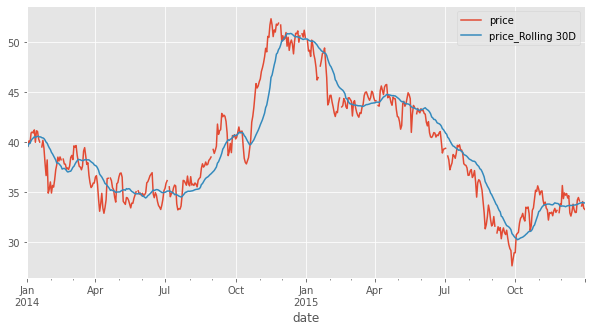

In [40]:
# Dados das ações da Yahoo
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')

# Ajuste da Frequência para Business Days
yahoo = yahoo.asfreq('B').loc['2014':'2015']

# Rolling Window para os 30 últimos dias + plot comparando a série original 

yahoo.join(yahoo.rolling(window='30D').mean().add_suffix('_Rolling 30D')).plot()
plt.show()

**NOTA IMPORTANTE:**

Uma importante característica para quando se deseja estudar séries temporais é a de corretamente conseguir ajustar o tamanho das figuras e gráficos (geralmente devem ser largos do que os gráficos tradicionais). Podemos ajustar o tamanho dos gráficos mediante o uso de: 

**Customizando o Tamanho:**
                                
plt.rcParams['figure.figsize'] = (20,3)                       

**Regressando às configurações padrão:**

plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']



C:\Users\User\AppData\Local\Temp\ipykernel_20772\1549637293.py:13: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  yahoo.join(yahoo.rolling(window='30D').agg(['mean','median','std']).add_suffix('_Rolling 30D')).plot(subplots = True)


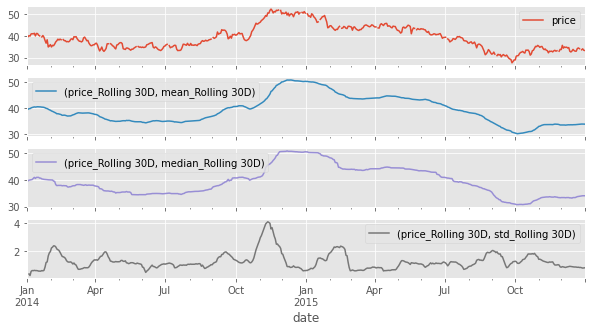

In [41]:
# Assim como no caso de Downsampling, podemos utilizar o método .agg([...]) para definir múltiplas métricas com .rolling(...)

# Dados das ações da Yahoo
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')

# Ajuste da Frequência para Business Days
yahoo = yahoo.asfreq('B').loc['2014':'2015']

# Rolling Window para os 30 últimos dias + plot comparando a série original 

# Usando .agg() para calcular a média, a mediana e o desvio padrão

yahoo.join(yahoo.rolling(window='30D').agg(['mean','median','std']).add_suffix('_Rolling 30D')).plot(subplots = True)
plt.show()

 

Outra função de interesse para ser utiliza em conjunto com .rolling(...) é **.quantile(n)** ou seja, determina o n-ésimo-quantil dos dados na janela 

A proxima classe de window functions são as chamadas Expanding Windows. São de peculiar interesse quando o progresso ao longo da série temporal é importante. Um exemplo poderia ser a taxa de retorno de um investimento, claculado com base em todo o percurso da série temporal até aquele instante. Em pandas, podemos criar expanding windows mediante o uso de **.expanding(...)** da mesma forma que utilizamos .rolling( ... ). Em algumas situiações ordinárias, podemos simplesmente utiolizar os métodos **.cumsum(), .cumprod(), .cummin() ou .cummax()**. 



In [42]:

# Importando Numpy
import numpy as np

# Dados Aleatórios
Data_Aleatoria = pd.DataFrame(data = {'data':5*np.random.rand(5)})

# Dois métodos de Expanding Window
Data_Aleatoria['Metodo_1'] = Data_Aleatoria.data.expanding().sum()
Data_Aleatoria['Metodo_2'] = Data_Aleatoria.data.cumsum()

# Mostrando os Dados
Data_Aleatoria.head()

# Averigua-se que se trata do mesmo resultado

,data,Metodo_1,Metodo_2
0,0.884157,0.884157,0.884157
1,3.733615,4.617773,4.617773
2,4.368019,8.985791,8.985791
3,0.666950,9.652741,9.652741
4,0.966217,10.618958,10.618958


Para aplicarmos métodos customizados, devemos definir uma função via "def" e depois aplicar .apply(...) após .rolling(...) ou .expanding(...). 
Nota-se que devemos definir funções levando em consideração que os dados serão fornecidos via np.arrays, ou seja, arrays do Módulo Pandas. 

Exemplo: Calculando os retornos de Investimentos 

In [43]:
def Retorno_Geral(retorno_intervalo):
   return np.prod(retorno_intervalo + 1) - 1

Gerar Números Aleatórios é uma habilidade de interesse para a simulação de séries temporais. Os módulos numpy.random e scipy.stats são de fundamentalm importância para atingir este objetivo. Para uma simualação de uma distribuição normal: 

e:\PYTHON\Estudos\Time_Series\Environment_Time\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição Normal -- 1000 Números')

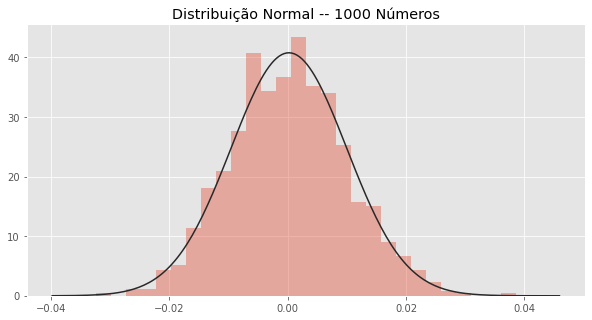

In [44]:
import matplotlib.pyplot as plt

from numpy.random import normal, seed

import seaborn as sns

from scipy.stats import norm 


seed(42)

# Criando 1000 números aleatórios de uma distribuição normal (média 0 e desvio padrão 0.01)
Retornos_Aleatorios = normal(loc = 0, scale = 0.01, size = 1000)

# Histograma
sns.distplot(Retornos_Aleatorios, fit = norm, kde = False)
plt.title('Distribuição Normal -- 1000 Números')


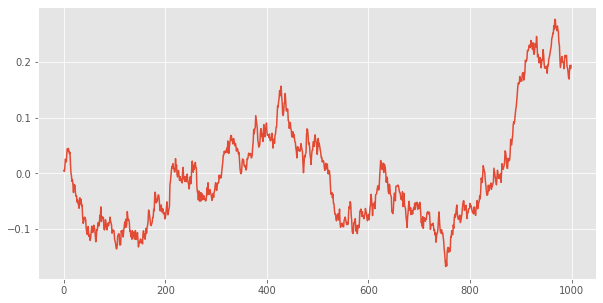

In [45]:
# Para criar uma série temporal do tipo Randoim Walk: 

Serie_Random_Walk = pd.Series(Retornos_Aleatorios).cumsum()
Serie_Random_Walk.plot(grid = True)
plt.show()

**Correlações entre Séries Temporais:**

Assim como sabemos, correlaçãop indica a força do relacionamento linear entre dois conjuntos de dados. No contexto do mercado financeiro, essa correlação é importante para predição e administração/controle de risco. O coeficiente de correlação de pearson é dado por: 

r(x,y) = cov(x,y)/(std(x)*std(y))

Uma forma muito simples de avaliar correlação entre séries temporais é mediante sns.jointplot(...)

           Debt     Unemp
Debt   1.000000 -0.892507
Unemp -0.892507  1.000000


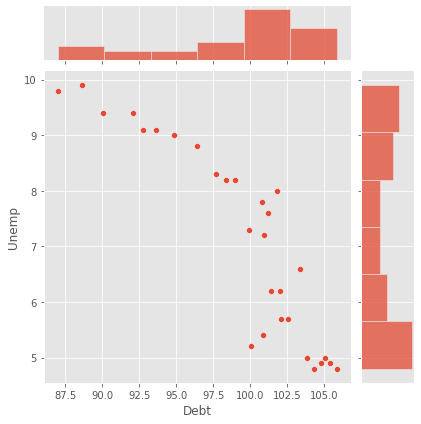

In [46]:
# O par Debt/GDP (Dívida Externa / PIB) e taxa de desemprego se econtram correlacionados ? 

# Dados armazenados em debt_unemploytment.csv e retirando dados faltantes
Dados_Economia = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date').dropna()
Dados_Economia.columns = ['Debt','Unemp']

# Sns.jointplot e método pd.DataFrame.corr() para a matrix de variância-covariância  
sns.jointplot(x = 'Debt',y = 'Unemp', data = Dados_Economia)
print(Dados_Economia.corr())

# Outa possível visualização: sns.heatmap(Dados_Economia.corr(), annot= True)

**Curso 02: Time Series Analysis in Python**

Capítulo 01: *Correlation and Autocorrelation*

Para juntarmos duas séries temporais, podemos tanto utilizar pd.concat() quanto dataframe.join(). As diferenças entre ambos é destacada nos exemplos a seguir


In [47]:
import numpy as np

TS_1 = pd.DataFrame({'Dados_1' : np.random.random(5), 'Date' : ['2012','2013','2014','2015','2016']})
TS_1.set_index('Date', inplace= True)
TS_1.index = pd.to_datetime(TS_1.index)

TS_2 = pd.DataFrame({'Dados_2' : np.random.random(5), 'Date' : ['2013','2014','2015','2016','2017']})
TS_2.set_index('Date', inplace= True)
TS_2.index = pd.to_datetime(TS_2.index)

pd.concat([TS_1,TS_2], axis = 1)



,Dados_1,Dados_2
Date,,
2012-01-01,0.167483,NaN
2013-01-01,0.104568,0.936212
2014-01-01,0.636430,0.051971
2015-01-01,0.706476,0.541296
2016-01-01,0.031586,0.709061
2017-01-01,NaN,0.870969


In [48]:
import numpy as np

TS_1 = pd.DataFrame({'Dados_1' : np.random.random(5), 'Date' : ['2012','2013','2014','2015','2016']})
TS_1.set_index('Date', inplace= True)
TS_1.index = pd.to_datetime(TS_1.index)

TS_2 = pd.DataFrame({'Dados_2' : np.random.random(5), 'Date' : ['2013','2014','2015','2016','2017']})
TS_2.set_index('Date', inplace= True)
TS_2.index = pd.to_datetime(TS_2.index)

TS_1.join(TS_2, how='inner')

,Dados_1,Dados_2
Date,,
2013-01-01,0.801728,0.894817
2014-01-01,0.339450,0.547592
2015-01-01,0.814825,0.817298
2016-01-01,0.080115,0.452318


Quando lidamos com séries temporais (principalmente aquelas relacionadas ao mercado financeiro), é importante notar que duas séries podem aparentar estar correlacionadas (por exemplo ambas com tendências de crescimento) mas não possuirem quaisquer relações de causa e efeito. Geralmente, podemos identificar correlações mais úteis quando comparamos a **mudança percentual** das séries temporais (dadas via .pct_change()). 

A primeira forma que podemos relacionar duas séries temporais é mediante uma regressão linear simples (OLS - Ordinal Least Squares). Existem 4 principais formas de realizar uma regressão linear simples em python: 

**Statsmodels:** 

*Import statsmodels.api as sm* 

*sm.OLS(y,x).fit()*

**Numpy:**

*np.polyfit(x,y, deg = 1)*

**Pandas:**

*pd.ols(y,x)*

**Scipy:**

*from scipy import stats*

*stats.linregress(x,y)*



In [49]:
# Exemplo Utilizando Statsmodels

import statsmodels.api as sm

# Dados armazenados em debt_unemploytment.csv e retirando dados faltantes
Dados_Economia = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date').dropna()
Dados_Economia.columns = ['Debt','Unemp']
Dados_Economia_Var = Dados_Economia.pct_change().dropna()

# Para se utilizar o modelo Linear de Stats Models, devemos adicionar uma coluna de constantes (caso contrário, resultaraá em uma regressão do tipo y = ax)

Dados_Economia_Var = sm.add_constant(Dados_Economia_Var)
print(Dados_Economia_Var.head())

# Regresão Linear

results = sm.OLS(Dados_Economia_Var['Debt'],Dados_Economia_Var[['Unemp','const']]).fit()
print(results.summary())

# Como podemos observar, a regressão não foi significativa (F-Value), assim como nenhum coeficiente. 
# Para extrairmos os coeficientes/resultados da regressão, utilizamos results.params[n]
# 0 - Intercept
# 1 - Coeficientes 



            const      Debt     Unemp
date                                 
2010-04-01    1.0  0.019156  0.010204
2010-07-01    1.0  0.015720 -0.050505
2010-10-01    1.0  0.022471  0.000000
2011-01-01    1.0  0.016914 -0.031915
2011-04-01    1.0 -0.009351  0.000000
                            OLS Regression Results                            
Dep. Variable:                   Debt   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.3069
Date:                Tue, 29 Mar 2022   Prob (F-statistic):              0.584
Time:                        09:39:43   Log-Likelihood:                 80.768
No. Observations:                  28   AIC:                            -157.5
Df Residuals:                      26   BIC:                            -154.9
Df Model:                           1                                         
Covariance Type:       

***Autocorrelation:***

Trata-se da correlação de uma série temporal com uma versão "Lagged" dela mesma, ou seja, a correlação de uma série X(t) com X(t-1). Geralmente, quando denominados "autocorrelação", estamos nos referindo a correlação de Lag 1. No mundo das séries financeiras, séries com autocorrelação  negativa são chamadas de **mean reversing** enquanto aquelas com autocorrelação positiva de **Trend Following**. 

***Ações e Renda Variável*** - Geralmenmte possuem autocorrelação negativa durante o período de uma semana

***Commodities*** - Geralmente possuem autocorrelação positiva ao longo de vários períodos

NOTA: Dados Econômicos dos EUA podem ser acessados no FRED - *Federal Reserve Economical Data*

&nbsp;&nbsp;&nbsp;

<img src="Mean.png" alt="Mean" width="800"/>



A autocorrelação do Desemprego é: 0.99


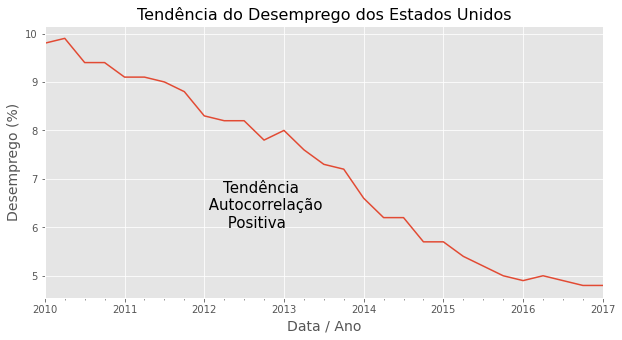

In [50]:
# A Autocorrelação de Uma Série Temporal é dada via .autocorr()

# Importando os Dados
Dados_Economia = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date').dropna()
Dados_Economia.columns = ['Debt','Unemp']

# Computando a Autocorrelação
autocorr = Dados_Economia['Unemp'].autocorr()
print('A autocorrelação do Desemprego é:',str(round(autocorr, 2)))

# Gráfico da Time Series

import datetime as dt

plt.rcParams['figure.figsize'] = (10,5)
Dados_Economia.Unemp.plot()
plt.ylabel('Desemprego (%)', fontdict={'size':14})
plt.xlabel('Data / Ano', fontdict={'size':14})
plt.title('Tendência do Desemprego dos Estados Unidos', fontdict={'size':16})
plt.annotate('    Tendência \n Autocorrelação \n     Positiva', xy = (dt.datetime(2012,1,1),6), fontsize = 15)
plt.show()



***Capítulo 02: Some Simple Time Series***

Qualquer autocorrelação significativamente diferente de 0 significa que podemos utilizar os dados passados para realizar predições. Dessa forma, uma autocorrelation function (ou ACF) é de papel fundamental para o estudo das séries temporais. Trata-se de uma das ferramentas fundamentais para a seleção de modelos de séries temporais. 

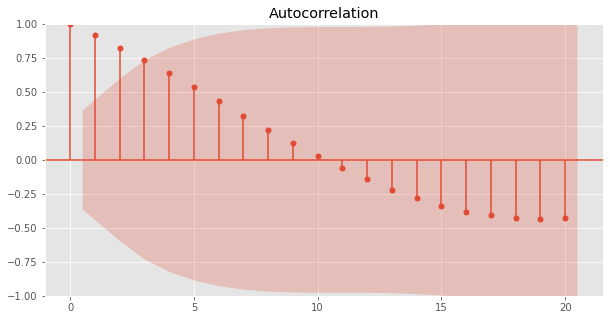

In [51]:
# Principal Função para Plotar o ACF

from statsmodels.graphics.tsaplots import plot_acf

# Dados

Dados_Economia = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date').dropna()
Dados_Economia.columns = ['Debt','Unemp']

# Lags = Número de Lags analisados ; Alpha = Nível de significância 
plot_acf(Dados_Economia['Unemp'], lags = 20, alpha = 0.05) # se alpha = 1 os limites de significância desaparecem
plt.show()



In [52]:
# Para se obter os valores diretamente, utilizamos: 

from statsmodels.tsa.stattools import acf 

print(acf(Dados_Economia['Unemp']))

[ 1.          0.91580414  0.82258623  0.73509485  0.63743135  0.53951405
  0.43257469  0.32236361  0.21732781  0.12654089  0.03051524 -0.05679768
 -0.13953415 -0.22303997 -0.28376264]


Uma definição comum de ***White Noise*** é a de: 

- Série Possui uma Média Constante
- Possui Variância Constante
- Possui autocorrelação nula em todos os Lags (não significantes)

Se os dados possuem uma distribuição Gaussiana/Normal, chamamos de ***Gaussian White Noise***


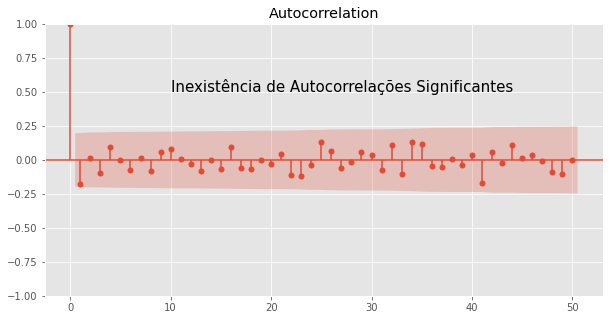

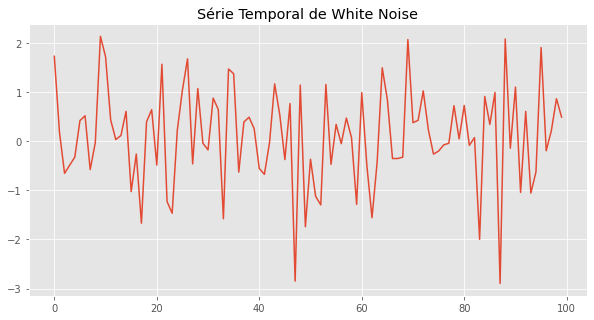

In [53]:
import numpy as np

WN = np.random.normal(loc = 0, scale = 1, size= 100)
plot_acf(WN, lags = 50)
plt.annotate('Inexistência de Autocorrelações Significantes', xy  = (10,0.5), fontsize = 15)
plt.show()

plt.plot(WN)
plt.title('Série Temporal de White Noise')
plt.show()


Em uma ***Random Walk*** o valor atual é igual a soma do valor do período anterior e um componente aleatório: 

X(t) = X(t-1) + e(t)

A partir desta definição, identificamos que a mudança de valor de uma Random Walk é um White Noise: 

X(t) - X(t-1) = e(t)

Dessa maneira, a melhor previsão para uma observação futura é meramente o valor de hoje. Caso se trate de uma Random Walk COM drift, ou seja: 

X(t) = $\mu $ + X(t-1) + e(t)

X(t) - X(t-1) = $\mu $ + e(t)

Uma forma de averiguar se uma série segue uma Random Walk é mediante o ***Teste de Dickey-Fuller***:

&nbsp;

<img src="Dickey.png" alt="Mean" width="1100"/>

In [54]:
# Função para Realizar o Teste de DF em Python 

from statsmodels.tsa.stattools import adfuller

P_Value = adfuller(WN)[1]

print('\n','The P-value of the Dickey-Fuller Test is: ', P_Value,'\n')
print('Null Hypothesis: Series in a Random Walk              (P-Value > 0.05)')
print('Alternative Hypothesis: Series in NOT a Random Walk   (P-Value < 0.05)', u'\u2713')



 The P-value of the Dickey-Fuller Test is:  4.095922825647657e-22 

Null Hypothesis: Series in a Random Walk              (P-Value > 0.05)
Alternative Hypothesis: Series in NOT a Random Walk   (P-Value < 0.05) ✓


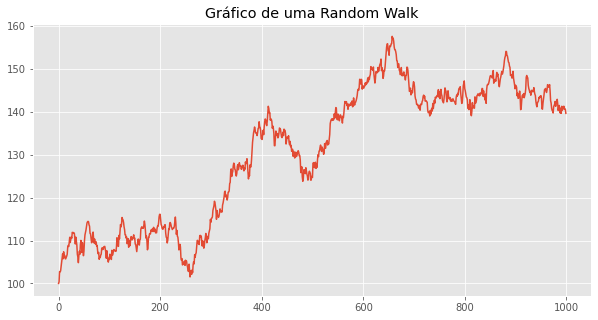

In [55]:
Noise = np.random.normal(loc = 0, scale = 1, size = 1000)
Noise[0] = 0

Random_Walk = 100 + np.cumsum(Noise)

plt.plot(Random_Walk)
plt.title('Gráfico de uma Random Walk')
plt.show()


In [56]:
from statsmodels.tsa.stattools import adfuller

P_Value = adfuller(Random_Walk)[1]

print('\n','The P-value of the Dickey-Fuller Test is: ', P_Value, '\n')
print('Null Hypothesis: Series in a Random Walk              (P-Value > 0.05)', u'\u2713')
print('Alternative Hypothesis: Series in NOT a Random Walk   (P-Value < 0.05)') 


 The P-value of the Dickey-Fuller Test is:  0.35419488350883643 

Null Hypothesis: Series in a Random Walk              (P-Value > 0.05) ✓
Alternative Hypothesis: Series in NOT a Random Walk   (P-Value < 0.05)


**Stationarity**: 

A característica de uma série ser estacionária possui múltiplas definições. No sentido amplo, uma série **fortemente estacionária** possui distribuição invariante em função do tempo. Uma versão mais simples de "estacionaridade" é a definição de **fracamente estacionária**, que diz que a média, a variância e a autocorrelação são invariantes no tempo*. 

- A autocorrelação: Corr( X , X ( *t* - $\tau$ ) ) depende somente de $\tau$ e não de *t*

A questão de Estacionaridade é importante ao passo que, se os parâmetros das distribuições variam com o tempo, resultaremos em inúmeros parâmetros a serem estimados. Se uma série não é estacionária, talvez existam mais parâmetros do que dados, ferindo assim o princípio da **parcimônia**: 

*"The general principle of parsimonious data modeling states that if two models in some way adequately model a given set of data, the one that is described by a fewer number of parameters will have better predictive ability given new data"*

Exemplos de Séries Não Estacionárias: 

- Random Walk 
- Séries com "Temporadas"/Seasons (cíclicas)
- Random Walk com Média/Desvio padrão dependentes do Tempo 

Muitas destas séries podem ser convertidas em séries estacionárias mediante transformações, como por exemplo uma **"diferenciação"** (diff). Em uma série com cliclos bem definidos, a diferença entre os períodos de ciclos adjacentes torna a série estacionária (se uma série claramente depende do mês do ano, diff(12) torna a série estacionária). Se uma série possui uma tendência **exponencial**, tomar o logarítmo da série torna a tendência linear. 

A imagem a seguir ilustra a ACF de uma série temporal que depende do Trimestre do ano. Aplicar uma diferença de 4 em 4 períodos regularizaria a série temporal: 

&nbsp;

<img src="Seasonal1.png" alt="Mean" width="500"/>

&nbsp;

<img src="Seasonal2.png" alt="Mean" width="500"/>

***Capítulo 03: Autoregressive (AR) Models***

A derivação matemática de um modelo AR(1) é dado por: 

X( *t* ) = $\mu$ + $\phi$ X( *t* - 1 ) + $\epsilon$( *t* )

Uma vez que somente um valor anterior  X (*t* - 1) está presente no lado direito. Neste caso, se $\phi$ = 1, trata-se de uma **Random Walk**, e se $\phi$ = 0, trata-se de **White Noise**. Para que a característica de estacionaridade seja mantida, -1 < $\phi$ < 1. Resgatando os conceitos anteriores: 

- $\phi$ < 0: **Mean Reversion**
- $\phi$ > 0: **Trend/Momentum**

Modelos AR de ordem superior, ou seja, AR(n) são dados por: 

X( *t* ) = $\mu$ + $\phi$ <sub>1</sub> X( *t* - 1 ) + $\phi$ <sub>2</sub> X( *t* - 2 )+ ... + $\phi$ <sub>n</sub> X( *t* - n ) + $\epsilon$( *t* )




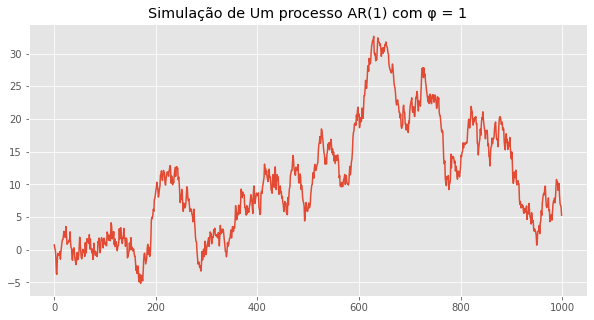

In [57]:
# A simulação de Dados Autoregressivos pode ser dada por: 

from statsmodels.tsa.arima_process import ArmaProcess

AR = np.array([1,-1]) #AR(1) com phi = 1
# Quando usando ArmaProcess, o primeiro coeficiente reporesenta o coeficiente de autoregressão nula (corr(X,X) = 1) enquanto os 
# demais coeficientes possuem sinais opostos aos que desejamos, ou seja, se desejamos phi = 1, colocamos -1 

MA = np.array([1]) #Mean Average - Será Explicado nos modelos MA(M)

AR_OBJ = ArmaProcess(AR,MA)
Dados_Simulation = AR_OBJ.generate_sample(nsample = 1000)
plt.plot(Dados_Simulation)
plt.title('Simulação de Um processo AR(1) com \u03C6 = 1')
plt.show()

# Observa-se que se trata de uma Random Walk Simples


In [58]:
# Para se Estimar os parâmetros de uma Série Autoregressiva: 

from statsmodels.tsa.arima.model import ARIMA

AR = np.array([1,-0.9])
MA = np.array([1])
AR_OBJ = ArmaProcess(AR,MA)
Dados_Simulation = AR_OBJ.generate_sample(nsample = 1000)

Modelo = ARIMA(Dados_Simulation,order = (1,0,0))
print(Modelo.fit().summary())
Modelo.fit().params


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1441.539
Date:                Tue, 29 Mar 2022   AIC                           2889.077
Time:                        09:39:46   BIC                           2903.801
Sample:                             0   HQIC                          2894.673
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1284      0.318     -0.403      0.687      -0.753       0.496
ar.L1          0.8986      0.014     63.300      0.000       0.871       0.926
sigma2         1.0445      0.049     21.352      0.0

array([-0.12840531,  0.89855818,  1.0445058 ])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1441.539
Date:                Tue, 29 Mar 2022   AIC                           2889.077
Time:                        09:39:47   BIC                           2903.801
Sample:                             0   HQIC                          2894.673
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1284      0.318     -0.403      0.687      -0.753       0.496
ar.L1          0.8986      0.014     63.300      0.000       0.871       0.926
sigma2         1.0445      0.049     21.352      0.0

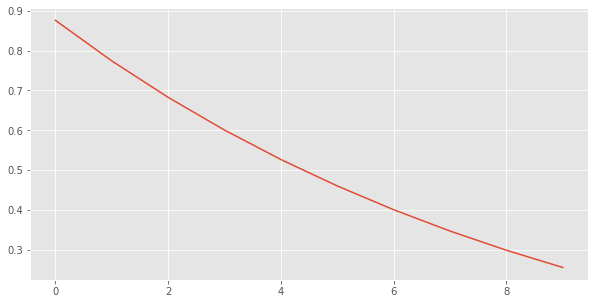

In [59]:
# Para se realizar predições acreca da série temporal, utilizamos: 

from statsmodels.tsa.arima.model import ARIMA

Modelo = ARIMA(Dados_Simulation, order = (1,0,0))
Resultado_Fit = Modelo.fit()
print(Resultado_Fit.summary())
plt.plot(Resultado_Fit.forecast(steps=10, exog=None, alpha=0.05))


**Identificando a Ordem de um Modelo:**

Assim como em todas as aplicações práticas de estatística, a ordem e a especificação dos modelos é desconhecida. Existem duas ferramentas para a escolha da ordem de um modelo AR(N): A ***partial auitocorrelation function (PACF)*** e o ***critério de informação (information criteria)***. 

- **PACF:**         No caso de modelos puramente AR, o número de LAGS significativos indica a ordem do modelo recomendada
- **AIC e BIC:**    Escolher o modelo com MENOR information criterion

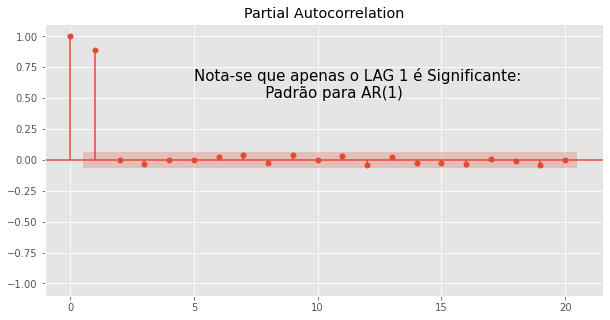

In [60]:
# PACF para Modelos AR(N)

from statsmodels.graphics.tsaplots import plot_pacf 

AR = np.array([1,-0.9])
MA = np.array([1])
AR_OBJ = ArmaProcess(AR,MA)
Dados_Simulation = AR_OBJ.generate_sample(nsample = 1000)

plot_pacf(Dados_Simulation, lags = 20, alpha = .05, method='ywm')
plt.annotate('Nota-se que apenas o LAG 1 é Significante: \n               Padrão para AR(1)', xy = (5,.5), fontsize = 15)
plt.ylim(-1.1,1.1)
plt.show()

In [61]:
# Information para Modelos AR(N): 
# Informação acerca da qualidade de ajuste do modelo (número de partâmetros escolhidos)
# Impõe-se uma penalidade ao número de parâmetros escolhidos

# AIC: Akaike Information Criterion
# BIC: Baysean Information Criterion

from statsmodels.tsa.arima.model import ARIMA

AR = np.array([1,-0.9])
MA = np.array([1])
AR_OBJ = ArmaProcess(AR,MA)
Dados_Simulation = AR_OBJ.generate_sample(nsample = 1000)

Modelo = ARIMA(Dados_Simulation, order = (1,0,0))
Resultado_Fit = Modelo.fit()
print('AIC: Akaike Information Criterion - ', round(Resultado_Fit.aic,2))
print('AIC: Akaike Information Criterion - ',round(Resultado_Fit.bic,2))


AIC: Akaike Information Criterion -  2861.19
AIC: Akaike Information Criterion -  2875.91


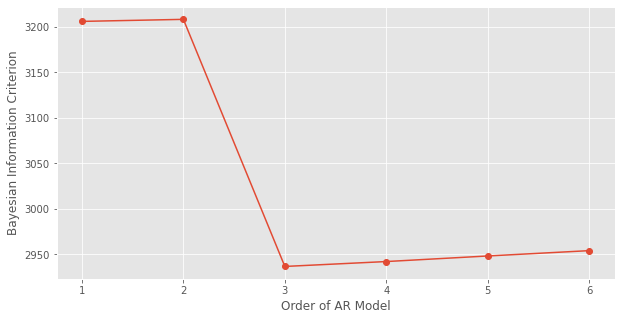

In [62]:

from statsmodels.tsa.arima.model import ARIMA

# AR(3) 
AR = np.array([1,-0.9, .5,-.5])
MA = np.array([1])
AR_OBJ = ArmaProcess(AR,MA)
Dados_Simulation = AR_OBJ.generate_sample(nsample = 1000)


BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(Dados_Simulation, order = (p,0,0))
    res = mod.fit() 
    BIC[p] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

***Capítulo 04 : Moving Average (MA) and ARMA models***

A derivação matemática de um modelo AR(1) é dado por: 

X( *t* ) = $\mu$  + $\epsilon$( *t* ) + $\theta$ $\epsilon$( *t* - 1)

Modelos MA de ordem superior, ou seja, MA(n) são dados por: 

X( *t* ) = $\mu$ + $\epsilon$( *t* ) + $\theta$<sub>1</sub>  $\epsilon$( *t* - 1) + ... + $\theta$<sub>n</sub>  $\epsilon$( *t* - n)


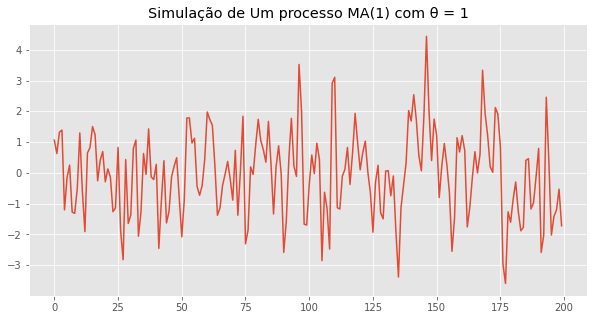

In [63]:
# Simulando um processo MA(1):

# A simulação de Dados Autoregressivos pode ser dada por: 

from statsmodels.tsa.arima_process import ArmaProcess

AR = np.array([1]) #AR(1) com phi = 1
# Quando usando ArmaProcess, o primeiro coeficiente reporesenta o coeficiente de autoregressão nula (corr(X,X) = 1) enquanto os 
# demais coeficientes possuem sinais opostos aos que desejamos, ou seja, se desejamos phi = 1, colocamos -1 

# No caso de ma, os coeficientes se encontram na disposição correta (positivo = positivo)

MA = np.array([1, 1]) #Mean Average - Será Explicado nos modelos MA(M)

AR_OBJ = ArmaProcess(AR,MA)
Dados_Simulation = AR_OBJ.generate_sample(nsample = 200)
plt.plot(Dados_Simulation)
plt.title('Simulação de Um processo MA(1) com \u03B8 = 1')
plt.show()

Modelos ***ARMA(N,N)*** são basicamente a fusão de um modelo AR(N) e um MA(N): 

X( *t* ) = $\mu$ + $\phi$ <sub>1</sub> X( *t* - 1 ) + $\phi$ <sub>2</sub> X( *t* - 2 )+ ... + $\phi$ <sub>n</sub> X( *t* - n ) + $\epsilon$( *t* ) + $\theta$<sub>1</sub>  $\epsilon$( *t* - 1) + ... + $\theta$<sub>n</sub>  $\epsilon$( *t* - n)

Estes modelos podem ser convertidos em MA "puros" ou AR "puros" mediante algumas transformações



***Princípio da Cointegração:***

Supondo duas séries de Random Walk ***X<sub>1</sub>(t)*** e ***X<sub>2</sub>(t)***, apesar de não serem passível passíveis de predição, uma combinação linear destas séries pode conter informações necessárias para predições. Exemplo: Ações/preços no mesmo ramo industrial podem possuir este tipo de relacionamento, como por exemplo bens intercambiáveis. 

Dois passos são necessários para testar Cointegração: 

- Realizar uma regressão de ***X<sub>1</sub>(t)*** em ***X<sub>2</sub>(t)*** e obter um coeficiente C
- Testar se ***X<sub>1</sub>(t)*** - C ***X<sub>2</sub>(t)*** é uma random walk (Dickey-Fuller)

Em python, estes dois passos foram condensados pela função **coint** de *statsmodels.tsa.stattools* 

e:\PYTHON\Estudos\Time_Series\Environment_Time\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


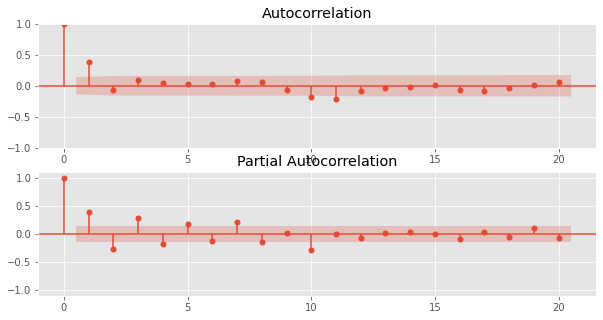

In [64]:
# Nota: Plotando ambos PACF e ACF em python: 
fig, axes = plt.subplots(2,1)

plot_acf(Dados_Simulation, lags=20, ax=axes[0])
plot_pacf(Dados_Simulation, lags=20, ax=axes[1])
plt.ylim(-1.1,1.1)
plt.show()


Modelos de Séries Temporais Mais avançados: 

- Modelos GARCH
- Modelos Não Lineares
- Modelos de Séries Temporais Multivariados
- Modelos de Mudança de Regime
- Modelos de Espaço-Tempo e FIltros de Kalman 



**Curso 03: Visualizando Séries Temporais em Python**

Séries temporais são onipresentes no mundo. 

Matplotlib é um dos pacotes mais populares e usados no mundo da programação e Data Science. Os métodos .plot() de ambos os objetos DataFrame e Series do módulo pandas são simplesmente um **Wrapper** da função plt.plot(). Para a mais apropriada visualização de Séries Temporais, colocam-se as datas no index do DataFrame, de forma que Pandas automaticamente formata o eixo X para o tipo *DateTime[ns]*. 

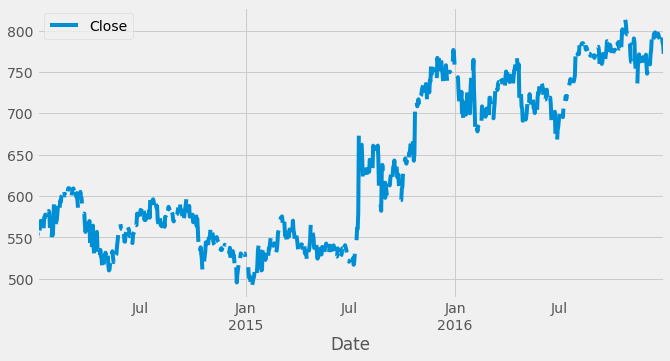

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


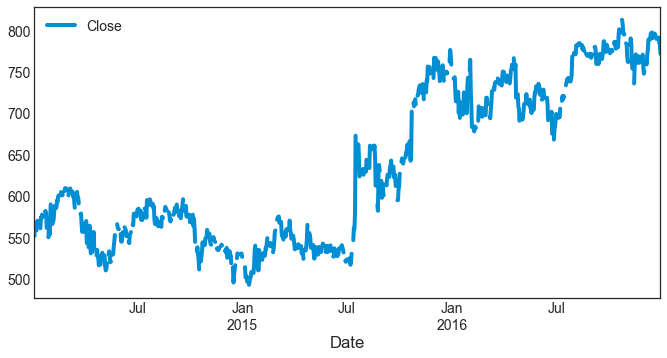

In [65]:
# Alterando o Estilo Padrão para Seus Gráficos 

import matplotlib.pyplot as plt
import pandas as pd

Dados_Plot = pd.read_csv('google.csv', parse_dates=['Date'], index_col = 'Date')

# Mudando o Estilo
plt.style.use('fivethirtyeight')
Dados_Plot.plot()
plt.show()

# Averiguando as Opções Disponíveis 
print(plt.style.available)

# Mudando o Estilo Novamente 
plt.style.use('seaborn-white')
Dados_Plot.plot()
plt.show()


<class 'pandas.plotting._core.PlotAccessor'>


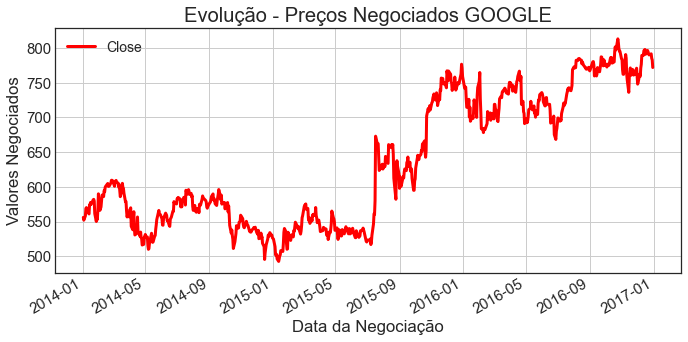

In [66]:
# Alterando as Definições do Gráfico

# Objeto: 
print(type(Dados_Plot.plot))

# Alterando os Aspectos Principais do Gráfico (objeto AX)
ax = Dados_Plot.dropna().plot(figsize = (10,5), fontsize = 15, linewidth = 3, color = 'Red', grid = True)

# Alterando as Lables: 
ax.set_xlabel('Data da Negociação')
ax.set_ylabel('Valores Negociados')
ax.set_title('Evolução - Preços Negociados GOOGLE')
plt.show()



Gráficos possuem propósitos ! Não se trata meramente de mostrar os dados contidos no DataSet. Geralmente, construímos visualizações para demonstrar nossa **cadeia de raciocínio** ou exaltar **eventos de interesse**. No caso anterior, averiguamos que houve um grande crescimento do valor negociado em meados de 2015. Para observarmos com maior detalhe: 

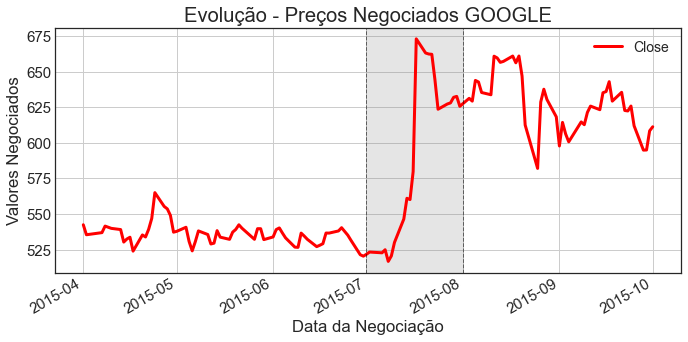

In [67]:

# Realizando o Slicing através do Index:
ax = Dados_Plot['2015-04':'2015-10-01'].dropna().plot(figsize = (10,5), fontsize = 15, linewidth = 3, color = 'Red', grid = True)

# Alterando as Lables: 
ax.set_xlabel('Data da Negociação')
ax.set_ylabel('Valores Negociados')
ax.set_title('Evolução - Preços Negociados GOOGLE')

# Introduzindo Linhas verticais entre as datas de interesse
ax.axvline(x = '2015-07-01', color = 'black', linewidth = 1, linestyle = "--", alpha = 0.5)
ax.axvline(x = '2015-08-01', color = 'black', linewidth = 1, linestyle = "--", alpha = 0.5)

# Sombreando para maior ênfase
ax.axvspan('2015-07-01','2015-08-01', color = 'grey', alpha = .2)


plt.show()


**NOTA:** Quando investigando DataSets de Séries Temporais, é de fundamental importância corretamente identificar onde observações faltantes estão presentes. Os métodos recomendados são **df.isnull() e df.notnull(  ).** 

O número de observações faltantes pode ser calculado via **df.isnull().sum()**

Assim como mencionado anteriormente, o método **.fillna(method = '...')** apresenta-se disponível para inputar dados faltantes em uma série temporal que possui este tipo de problema. Entretanto, nas últimas versões do módulo Pandas, tem sido substituído pelos métodos **df.ffill, df.bfill, df.last e df.interpolate.**



Outro método de grande utilidade para dispor dados de séries temporais é **df.groupby**. Quando associado com os métodos característicos dos índices, como **index.month**, podemos facilmente dispor: 

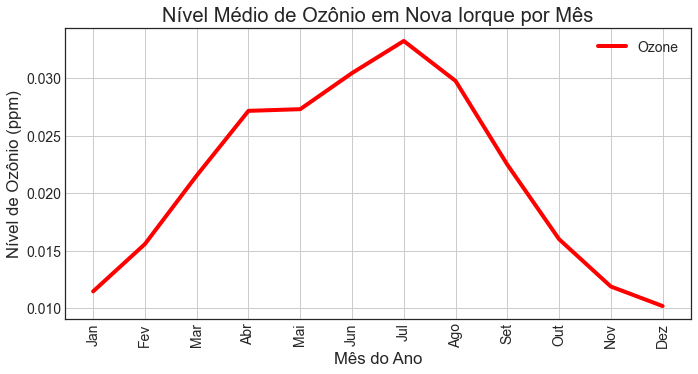

In [68]:
# Quando analisando Dados com características sazonais, podemos agrupar nossos dados via .groupby

# Dados de Ozônio 
Ozone = pd.read_csv('ozone_nyc.csv', parse_dates = ['date'], index_col = 'date')

# Meses do Ano
labels = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

# Gráfico
ax = Ozone.groupby(Ozone.index.month).mean().plot(color = 'red', grid = True)
ax.set_xlabel('Mês do Ano')
ax.set_ylabel('Nível de Ozônio (ppm)')
ax.set_title('Nível Médio de Ozônio em Nova Iorque por Mês')

# Alterando os 'Ticks' do Eixo X
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels, rotation = 'vertical')
plt.show()



             Ozone
count  6167.000000
mean      0.021293
std       0.011457
min       0.000094
25%       0.012464
50%       0.020242
75%       0.028956
max       0.076077


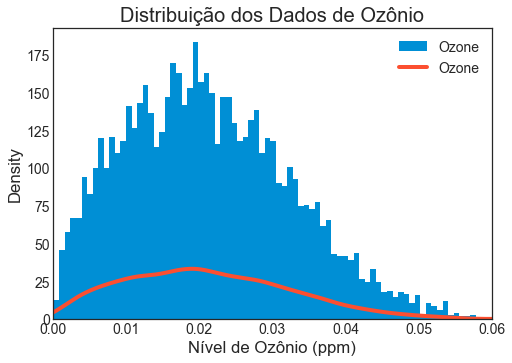

In [69]:
# Nota: O método .describe() funciona comom forma rápida de sumarizar as informações contidas nas colunas dos datasets

print(Ozone.describe())

# Histogramas via Pandas: 

ax = Ozone.plot(kind = 'hist', bins = 100, figsize = (7,5))
Ozone.plot(kind = 'density', ax = ax)
ax.set_title('Distribuição dos Dados de Ozônio')
ax.set_xlabel('Nível de Ozônio (ppm)')
ax.set_xlim(0,.06)
plt.show()


Algumas características de Séries Temporais podem ser enumeradas: 

1. **Sazonalidade**: Os dados possuem um claro padrão periódico 
2. **Tendência**: Os dados seguem uma clara trajetória (positiva ou negativa)
3. **Barulho/Noise**: Existem pontos outliers ou valores faltantes que não condizem com o resto dos Dados

A decomposição de Séries Temporais pode ser realizada por meio de: 

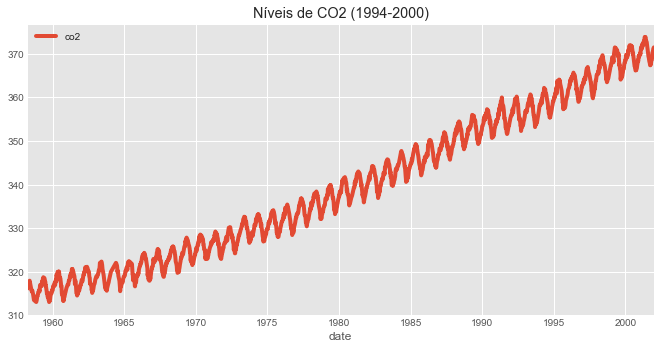

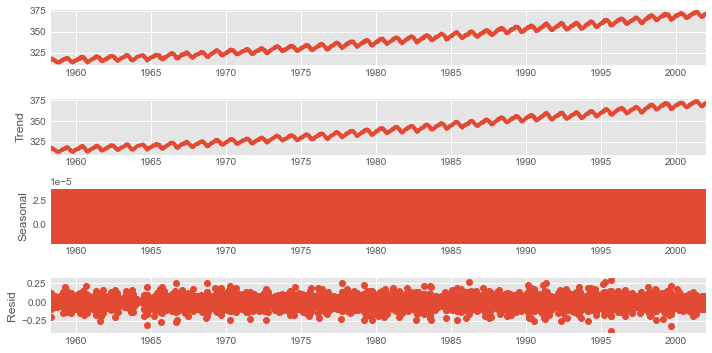

In [70]:
# Decomposição das Características de Séries Temporais: 

import statsmodels.api as sm

import matplotlib.pyplot as plt

from pylab import rcParams

plt.style.use('ggplot')

rcParams['figure.figsize'] = (10,5)

Co2_Data = pd.read_csv('CO2.csv', parse_dates = ['date'], index_col = 'date')

Co2_Data = Co2_Data.resample('D').interpolate()

ax = Co2_Data.plot()
ax.set_title('Níveis de CO2 (1994-2000)')
plt.show()

decomp = sm.tsa.seasonal_decompose(Co2_Data)
ax = decomp.plot()
plt.show()



Quando trabalhando com múltiplas Séries Temporais, uma visualização de particular intertesse são os gráficos de 'Área': **df.plot.area()**
Outro aspecto que deve ser levado em consideração é que a escolha das cores das séries é crucial para a clareza do gráfico. O argumento **colormap** de **.plot** permite escolher paletas de cores disponíveis via a biblioteca do Matplotlib. 

Uma função de interesse para a sumarização de dados é **plt.table ou ax.table**, que permite a disposição de uma tabela customizada de dados como parte do objeto gráfico.

Quando trabalhando com múltiplas séries, também se recomenda a utilização de subplots: 

***df.plot(<br> <br>
          subplots = True ,  <br> 
          layout =   (n,m),  <br>
          figsize =  (c,v),  <br>
          sharex =    True,  <br>
          sharey =   False,  <br> <br>
          )***

Quando estamos lidando com múltiplas séries temporais, indentificar correlações é fundamental. Os coeficientes de correlação de ***Kendall Tau ou Ranque de Spearman*** podem ser utilizados para avaliar relacionamentos entre variáveis não linearmente dependentes. 

$\tau$ (Kendall) = (C - D)/ (C + D)

C = Pares de Dados "Concordantes" ; D = Pares de Dados em "Discórdia"

Artigo de comparação entre Kendall-Tau e Spearmann [Aqui](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/kendalls-tau-and-spearmans-rank-correlation-coefficient/)

Tanto Pearson, Spearmann e Kendall estão disponíveis no módulo ***scipy.stats.stats***

&nbsp; 

<img src="Tau.png" alt="Mean" width="900"/>

In [98]:
# Importando as funções necessárias

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Dados de Desempregro vs Dívida/PIB

Dados_Economia = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date').dropna()
Dados_Economia.columns = ['Debt','Unemp']

# Estatísticas

Result_Pear = pearsonr(Dados_Economia['Debt'],Dados_Economia['Unemp'])
Result_Spear = spearmanr(Dados_Economia['Debt'],Dados_Economia['Unemp'])
Result_Tau = kendalltau(Dados_Economia['Debt'],Dados_Economia['Unemp'])

# Arrumando o Data Frame (arredondando os resultados)
Coef = [Result_Pear[0],Result_Spear[0],Result_Tau[0]]
Coef_Round = [round(num, 2) for num in Coef]

P = [Result_Pear[1],Result_Spear[1],Result_Tau[1]]
P_Round = ['{:0.2e}'.format(num) for num in P]


#Print
print('Resultados das Estatísticas \n       de Correlação \n')

print(pd.DataFrame(data = {'Método': ['Pearson','Spearman','Kendall-Tau'],
'Valor' : Coef_Round,
'P-Valor:': P_Round}).set_index('Método'))



Resultados das Estatísticas 
       de Correlação 

             Valor  P-Valor:
Método                      
Pearson      -0.89  7.79e-11
Spearman     -0.93  2.86e-13
Kendall-Tau  -0.82  7.21e-10


***NOTA***: Quando possuímos múltiplas séries temporais e desejamos rapidamente evidenciar as mais correlacionadas, podemos utilizar **clustermap** do Módulo seaborn, que gera um heatmap hierarquico baseado nas correlações entre as séries temporais: 

***sns.clustermap(DataFrame.corr(Method = 'Method'))***

***NOTA 2***: Quando analisando múltiplas Séries Temporais, é comum necessitar ajustar a legenda dos gráficos de forma a não ocupar espaços desnecessários ou com informações. Utilizamos o método **ax.lengend(bbox_toanchor = (x,y), loc = 'Localização')** para facilitar a visualização da mesma. 

***Curso 04: Machine Learning for Time Series***

**Capítulo 01:** Introdução a Machine Learning Aplicada a Séries Temporais

Assim como comentado anteriormente, independentemente do campo, Séries Temporais possuem aplicações práticas, uma vez que tempo constitui uma variável universal para todos os processos, fenômenos e projetos ***reais***. O tempo que se passa entre observações de uma série temporal define seu período. O avanço no poder de computação e na facilidade de se utilizar algoritimos para as aplicações de *Machine Learning* tiveram seus efeitos em basicamente **todos os campos de análise de dados**, incluindo, sem excessão, o campo da análise de séries temporais. Machine Learning consiste, basicamente, em achar padrões em dados, ioncluindo aqueles que não são imediatamente identificáveis pelos seres humanos, devido a seu volume ou complexidade. 

*Em machine Learning:*

- Estudam-se os dados;
- Modela-se o processo;
- Realizam-se predições;
- Automatizamos este processo.

Ou em termos de **Pipelines**: 

**Feature Extraction** %>% **Model Fitting** %>% **Prediction and Validation**

O módulo mais popular para Machine Learning em Python é ***Scikit-Learn:*** 

Este módulo/API possui uma estrutura comum para a grande maioria de seus algoritmos, possibilitando então a implementação de seus códigos de maneira padronizada

É comum se utilizar do método .reshape([-1,1]) para se ajustar os dados quando utilizando Scikit-Learn 

Sendo que os algoritmos esperam um formato de dados do tipo **(samples,features)**, sendo geralmente objetos do tipo **np.ndarray**



In [108]:
from sklearn.svm import LinearSVC    # (Support Vector Machines para Classificação de Dados) 
from sklearn import datasets

# Carregando os Dados e Determinando as Features

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

model = LinearSVC()   # Cria-se um objeto contendo o modelo desejado

model.fit(X,y)  # Realiza-se o Treinamento/Fit do Objeto contendo o Modelo 

print(model.coef_) # Determinando os Coeficientes

[[-1.5252504   2.25872238]
 [ 0.0999462  -0.97537001]
 [ 0.65562695 -0.32852329]]


e:\PYTHON\Estudos\Time_Series\Environment_Time\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [117]:
#Inspecionando o tipo de Objeto e Dimensões

print('O tipo de Objeto de X é ', type(X), 'Possuindo Dimensões ', X.shape)

print('O tipo de Objeto de y é ', type(y), 'Possuindo Dimensões ', y.shape)



O tipo de Objeto de X é  <class 'numpy.ndarray'> Possuindo Shape  (150, 2)
O tipo de Objeto de y é  <class 'numpy.ndarray'> Possuindo Shape  (150,)


In [129]:
# Para gerar predições a partir do modelo gerado, utiliza-se:

X_test = np.ndarray(buffer = np.array([5.1,3.5]), shape = (1,2))

predict = model.predict(X_test)

print('A classe Predita é ', predict)

A classe Predita é  [0]


***Nota Importante***

***Assim como já foi percebido, utiliza-se muito Pandas para o armazenamento de Datasets e Séries Temporais. Felizmente, a Integração entre SkLearn e Pandas é facilitada e a conversão de DataFrames em numpy nd arrays (Arrays de N dimensões) não representa um problema.***

A utilização precisa das ferramentas de Subsetting do Módulo Pandas é ilustrada no [guia do usuário](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)



In [159]:
# Transformando o DataSet iris presente em SkLearn em um DataFrame de Pandas

Iris_DF = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
Iris_DF['target'] = Iris_DF['target'].astype('int32')
Iris_DF.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [166]:

# Construindo X e Y 
X = Iris_DF[["petal length (cm)","petal width (cm)"]]
y = Iris_DF[['target']].values.ravel()

# Fit the model
model = LinearSVC()
model.fit(X, y)

# Para gerar predições a partir do modelo gerado, utiliza-se:
X_test = pd.DataFrame(data = {'petal length (cm)': [1.4] ,'petal width (cm)': [0.2] })
predict = model.predict(X)


# Calculando Métricas do Modelo
from sklearn.metrics import accuracy_score
Resultado_Percentual_Manual = sum(predict == y)/len(y)
Resultado_Percentual = accuracy_score(y,predict)

# Print dos Resultados Percentuais
print('Métrica Manual: ', Resultado_Percentual_Manual)
print('Accuracy Score: ', Resultado_Percentual)



Métrica Manual:  0.94
Accuracy Score:  0.94


In [167]:
# Realizando Validação Cruzada
from sklearn.model_selection import cross_val_score

model = LinearSVC()
scores = cross_val_score(model,X,y, cv = 5)
print(scores)


[0.96666667 0.96666667 0.9        0.9        0.96666667]


**Combinando Machine Learning e Time Series**

- *Análise de **Dados Sonoros**:* 

    Algumas time series de interesse consistem em gravações de áudio. O módulo *librosa* permite extrair informações de arquivos .wav. 

    Antes de prosseguir para qualquer tipo de aplicação de Machine Learning, deve-se sempre iniciar pela visuzaliação dos dados "nus"/"crus" disponívies. Grealmente, dados deste tipo possuem desvios/interferências que impossibilitam uma performance apropriada dos modelos ("Noisy Data"). Geralmentem, calculam-se estatísticas de sumário dos dados para se padronizar os mesmos.

    Realizar Smoothing em dados de Som permite administrar a quantidade de ruído que comprometeria a análise. Rolling winmdows de média funcionam como forma de Smoothing. A rfetificação de dados de som consiste em tomar o valor absoluto da série e aplicar uma rolling window. 

    Informações Adicionais Acerca de Séries Temporais sonoras podem ser obtidas mediante a análise de **Tempos** e a construção de **Espectrogramas** mediante a aplicação de **Transformatas de Fourier**, que basicamente converte a série temporal em uma **combinação de séries oscilatórias**. A combinação de uma transformata de fourier com uma rolling window se denomina de ***Short-Time Fourier Transform (STFT)***. 

    **Rolling Window** *%>%* **Função: Transformata de Fourier** *%>%* **( )<sup>2</sup>** *%>%* **Espectrograma**

&nbsp;

- *Análise de **Dados Numéricos**:*
    
    Tratam-se, geralmente, de problemas de modelagem e **predição de observações futuras**. Uma alterantiva de modelagem de séries temporais consiste em utilizar Ridge Regression, disponível no submódulo **sklearn.linear_model** como **Ridge**. Geralmente, utilizar algoritmos de regressão ***diretamente*** em dados de time series não resulta em análises muito "produtivas" ou em resultados "utilizáveis" (performance baixa de ajuste e predição).  

    Passo fundamental, assim como no caso dos dados sonoros, é a limpeza apropriada dos dados adquiridos. Dois problemas principais que nos deparamos são: *Outliers* e *Dados Faltantes*, ambos facilmente identificáveis pela visuzaliação completa dos dados. Ferramentas comummente utilizadas: 

    - **Transformação dos Dados**: Aplicar transformações logarítimicas, diferenças, variações percentuais, rolling windows de média, padronização .... 
    - **Inputação de Dados**: Bfill, Ffill, interpolação linear, interpolação dinâmica .... [mais opções](https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/)
    - **Substituição de Outliers**: Remover o efeito negativo de enviesamento pela substituição de dados Outliers

&nbsp; 

***Nota:*** A função **partial()**, disponível em **functools** permite criar uma nova função a partir da estrutura de uma função já existente, sendo extremamente útil para a readaptação de certas funções para séries temporais. Um exemplo é a readaptação da função np.percentile() para o cálculo de múltiplos percentis. 

&nbsp;

O exemplo a seguir ilustra a utilização de Ridge Regression com diferentes Lags da Série "Unemp", que representa as taxas de desemprego: 



In [191]:
# Criando uma função para Atrasar uma Time Series: 

def Series_Shift(data,shifts):
    
    shifts = np.arange(1, shifts).astype(int)
    shifted_data = {"lag_{}".format(day_shift): data.shift(day_shift) for day_shift in shifts}
    shifted_data = pd.DataFrame(shifted_data)
    X = shifted_data.fillna(np.nanmedian(shifted_data))
    y = data.fillna(np.nanmedian(data))
    
    return X, y, shifted_data


# Exemplo de Aplicação 
X , y, Dados_Economia_Shift = Series_Shift(Dados_Economia['Unemp'],5)

print(Dados_Economia_Shift.head())


            lag_1  lag_2  lag_3  lag_4
date                                  
2010-01-01    NaN    NaN    NaN    NaN
2010-04-01    9.8    NaN    NaN    NaN
2010-07-01    9.9    9.8    NaN    NaN
2010-10-01    9.4    9.9    9.8    NaN
2011-01-01    9.4    9.4    9.9    9.8


In [213]:

# Utilizando os Dados Atrasados como features da Ridge Regression:

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

model = Ridge()
model.fit(X,y)
r2 = r2_score(y, model.predict(X))
msq = mean_squared_error(y, model.predict(X))

print('Resultado do Modelo de Ridge Regression: \n')
print('Coeficientes do Modelo: ',model.coef_)
print('O valor de R\u00b2: ',round(r2,2))
print('O valor do Erro Quadrático Médio: ', round(msq,3))


Resultado do Modelo de Ridge Regression: 

Coeficientes do Modelo:  [ 0.93863851  0.02649851  0.12737799 -0.1160093 ]
O valor de R²:  0.92
O valor do Erro Quadrático Médio:  0.228


In [243]:
# Princípios de Cross-Validation (ou validação cruzada) também são importantíssimos pa
# ra as aplicações de Machine Learning. As séries temporais não fogem deste princípio.  

# A forma mais simples de C.V são as K-Fold C.V 

# Não é Recomendando usar "Shuffle", ou seja, aleatoriamente seccionar dados de Séries
# Temporais, uma vez que as observações NÃO SÃO INDEPENDENTES ENTRE SI

from sklearn.model_selection import KFold

cv = KFold(n_splits = 5 , shuffle = False)
model = Ridge()

X , y , Dados_Economia_Shift = Series_Shift(Dados_Economia['Unemp'] , 3)

A = []

for tr, tt in cv.split(X, y):
    model.fit(X.iloc[tr], y.iloc[tr])
    B = model.score(X.iloc[tt], y.iloc[tt])
    A.append(B)
    
print('A média de Model Performance foi de: ', np.mean(A))


A média de Model Performance foi de:  -2.4472355919814555


Apesar de ser muito interessante para dados independentes, quando estudamos séries temporais não estamos interessados em utilizar dados do futuro para prever dados passados (como realiza KFold no exemplo passado). Dessa maneira, uma forma alternativa de Cross Validation deve ser utilizada, de forma que os **dados de treino** sejam provenientes do **passado** e os dados de **teste** sejam provenientes do **futuro**. Este tipo de C.V. está disponível em **sklearn.model_selection.TimeSeriesSplit**.  

In [251]:
from sklearn.model_selection import TimeSeriesSplit

cv_ts = TimeSeriesSplit(n_splits = 5)

model = Ridge()

X , y , Dados_Economia_Shift = Series_Shift(Dados_Economia['Unemp'] , 3)

A = []

for tr, tt in cv_ts.split(X, y):
    model.fit(X.iloc[tr], y.iloc[tr])
    B = model.score(X.iloc[tt], y.iloc[tt])
    A.append(B)
    
print('A média de Model Performance foi de: ', np.mean(A))


A média de Model Performance foi de:  -13.971666753642939


***Curso 05: Arima Models in Python***

Lembrando do comportamento dos modelos AR e MA nos plots de PACF e ACF 

&nbsp;

<img src="PACF.png" alt="Mean" width="500"/>

&nbsp;

Em algumas instâncias, é interessante poder um processo do tipo ARMA: 

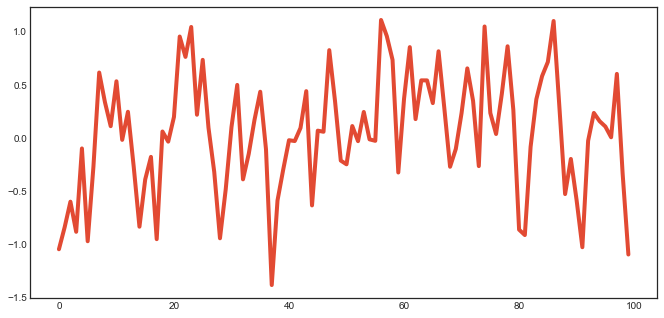

In [257]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coef = [1,-0.5] # Lembrando que os coeficientes seguem um padrão de -Coef (sinal invertido)
ma_coef = [1,0.2]

y = arma_generate_sample(ar_coef,ma_coef,nsample = 100, scale=.5)

plt.style.use('seaborn-white')
plt.plot(y)
plt.show()


Um processo do tipo ***ARMAX*** introduz os conceitos abordados pelo ARMA mas também possibilita a introdução de variáveis regressoras exógenas, assim como outras séries. 

X( *t* ) = $\mu$ + **a<sub>1</sub> Z<sub>1</sub>(t)** + $\phi$ <sub>1</sub> X( *t* - 1 ) + $\phi$ <sub>2</sub> X( *t* - 2 )+ ... + $\phi$ <sub>n</sub> X( *t* - n ) + $\epsilon$( *t* ) + $\theta$<sub>1</sub>  $\epsilon$( *t* - 1) + ... + $\theta$<sub>n</sub>  $\epsilon$( *t* - n)

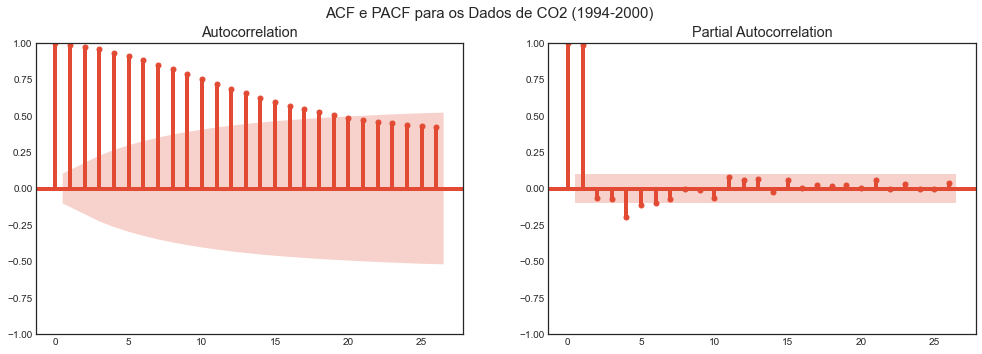

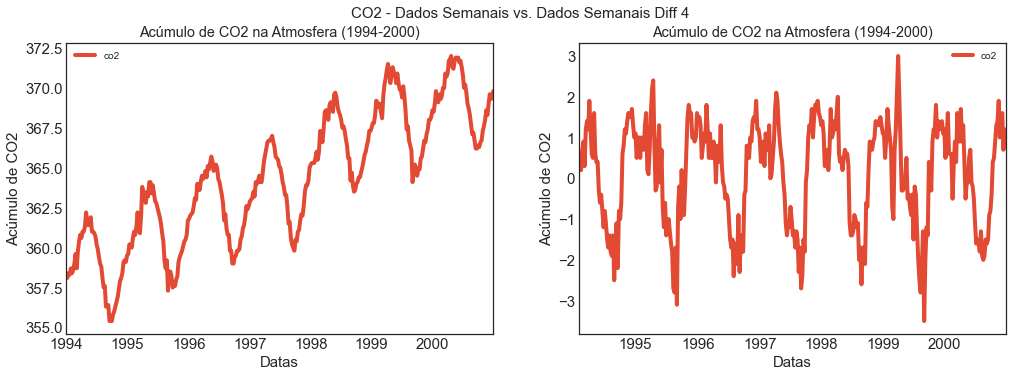

In [311]:
# Carregando e Preparando os Dados sob frequência Semanal
Dados_Co2 = pd.read_csv('CO2.csv', parse_dates = ['date'], index_col = 'date')
Dados_Co2 = Dados_Co2.resample('W').mean()['1994':'2000']

# PACF e ACF para os Dados Originais
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('ACF e PACF para os Dados de CO2 (1994-2000)', fontsize = 15)
plot_acf(Dados_Co2, ax = ax[0])
plot_pacf(Dados_Co2, ax = ax[1], method='ywm')
plt.show()

# Visualização dos Gráficos
fig , ax = plt.subplots(1,2, figsize = (15,5))

# Gráfico 1 
Dados_Co2.plot(fontsize = 15, ax = ax[0])
ax[0].set_xlabel('Datas', fontdict={'size' : 15})
ax[0].set_ylabel('Acúmulo de CO2', fontdict={'size' : 15})
ax[0].set_title('Acúmulo de CO2 na Atmosfera (1994-2000)')

# Gráfico 2 
Dados_Co2.diff(4).dropna().plot(fontsize = 15, ax = ax[1])
ax[1].set_xlabel('Datas', fontdict={'size' : 15})
ax[1].set_ylabel('Acúmulo de CO2', fontdict={'size' : 15})
ax[1].set_title('Acúmulo de CO2 na Atmosfera (1994-2000)')

fig.suptitle('CO2 - Dados Semanais vs. Dados Semanais Diff 4', fontsize = 15)
plt.show()



0.3693716038893462
3.265172465702612e-06


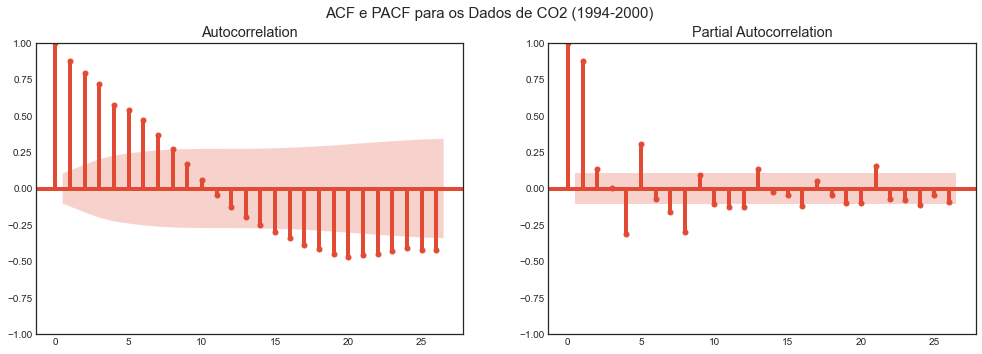

In [312]:
# Identificando Estacionaridade: 

print(adfuller(Dados_Co2)[1])
print(adfuller(Dados_Co2.diff(4).dropna())[1])

Co2_Diff_4 = Dados_Co2.diff(4).dropna()

# PACF e ACF para os Dados Originais
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('ACF e PACF para os Dados de CO2 (1994-2000)', fontsize = 15)
plot_acf(Co2_Diff_4, ax = ax[0])
plot_pacf(Co2_Diff_4, ax = ax[1], method='ywm')
plt.show()


In [514]:
# A atualização de statsmodels recomenda a utilização de ARIMA 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def Print_Results_TS_Model(Dataset, order_arima , steps = 5, Nome_Dataset = 'Dados', n = 10, interval = True):

    """
    Função Para se Ajustar um modelo ARIMA de Ordem (p,d,q) em um DataFrame de Pandas,
    dispor o sumário dos resultados e visualizar a imediata previsão de resultados. 

    Dataset: DataFrame de Pandas Contendo os Dados desejados (Index em DateTime e Coluna com Valores)
    
    order_arima: (p,d,q) = (Ordem de AR, Ordem de Diff, Ordem de MA) = (AR,I,MA)

    steps: Número de Períodos para Estimar

    Nome_Dataset: Nome que deseja-se dar aos Dados (Padrão é 'Dados')

    n: Número deperíodos da série original que serão plotados (Padrão n = 10)

    interval: Colocar ou não os intervalos de confiança de 95% no gráfico (Padrão = True)
    """
    
    model = SARIMAX(Dataset, order = order_arima)
    results = model.fit()

    print(results.summary())

    forecast = results.get_forecast(steps = steps)
    Mean = forecast.predicted_mean
    Conf = forecast.conf_int()
    Lower = Conf.iloc[:,0]
    Upper = Conf.iloc[:,1]

    plt.plot(Dataset.iloc[len(Dataset.index) - n :len(Dataset.index)])
    plt.plot(Mean, color = 'black')
    plt.grid()
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('Datas',fontdict={'size':12})
    if interval == True: 
        plt.fill_between(Mean.index,Lower,Upper, color = 'grey', alpha = .25)
    plt.title('Forecast de ' + str(steps) + ' períodos de ' + Nome_Dataset, fontdict = {'size':17})
    plt.show()

    return results



                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  366
Model:               SARIMAX(4, 4, 0)   Log Likelihood                -458.315
Date:                Thu, 31 Mar 2022   AIC                            926.630
Time:                        11:55:28   BIC                            946.088
Sample:                    01-02-1994   HQIC                           934.365
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7950      0.041    -43.811      0.000      -1.875      -1.715
ar.L2         -1.8993      0.068    -28.136      0.000      -2.032      -1.767
ar.L3         -1.2816      0.072    -17.818      0.0

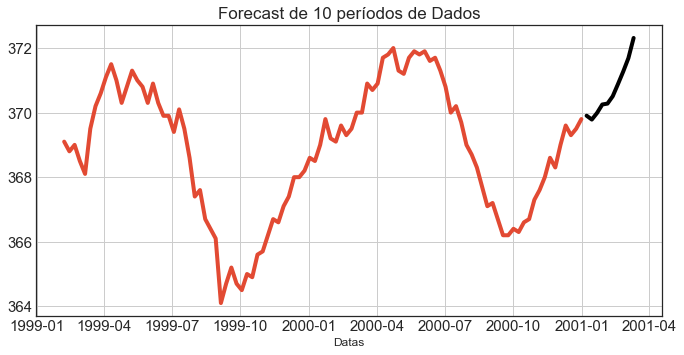

In [516]:
Resultados = Print_Results_TS_Model(Dados_Co2 , order_arima = (4,4,0), steps = 10, n = 100, interval = False)

Quando investigando modelos do tipo ***SARIMAX***, é crucial poder ajustar múltiplos modelos e avaliar seus ***parâmetros de ajuste (BIC, AIC, significância estatística dos parâmetros e etc..)***. Um exemplo de estrutura que nos permite investigar múltiplos modelos pode ser dada por: 

In [499]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings


# Carregando e Preparando os Dados sob frequência Semanal
Dados_Co2 = pd.read_csv('CO2.csv', parse_dates = ['date'], index_col = 'date')
Dados_Co2 = Dados_Co2.resample('W').mean()['1994':'2000']



def Avaliar_Ordem_ARIMA(Dataset, AR_Max = 5, MA_Max = 5, Diff_Max = 5):

    Avaliar_ARIMA = []

    warnings.filterwarnings('ignore')

    # Ordem de AR 
    for p in range(AR_Max+1):
        # Ordem de Diff
        for i in range(Diff_Max+1):
            # Ordem de MA
            for q in range(MA_Max+1):
                try:
                    model = SARIMAX(Dataset,order = (p,i,q), method_kwargs={"UserWarning": False})
                    result = model.fit()

                    Avaliar_ARIMA.append((p,i,q, result.aic, result.bic))
                
                except:
                        Avaliar_ARIMA.append((p,i,q,None,None))

    Avaliar_ARIMA_df = pd.DataFrame(Avaliar_ARIMA, columns = ['P','I','Q','AIC','BIC'])

    warnings.resetwarnings()

    return Avaliar_ARIMA_df


In [563]:

# Avaliando e Definindo os Resultados
Data_ARIMA = Avaliar_Ordem_ARIMA(Dados_Co2, AR_Max = 4, MA_Max = 4, Diff_Max = 4)
print(Data_ARIMA.sort_values('AIC').head())


     P  I  Q         AIC         BIC
76   3  0  1   10.000000   29.513167
59   2  1  4  473.512697  500.811978
108  4  1  3  474.436459  505.635638
107  4  1  2  484.399012  511.698293
84   3  1  4  486.501995  517.701174


e:\PYTHON\Estudos\Time_Series\Environment_Time\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  366
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -229.218
Date:                Thu, 31 Mar 2022   AIC                            474.436
Time:                        17:15:35   BIC                            505.636
Sample:                    01-02-1994   HQIC                           486.835
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0531      0.188     10.931      0.000       1.685       2.421
ar.L2         -1.3313      0.320     -4.161      0.000      -1.958      -0.704
ar.L3          0.4135      0.128      3.225      0.0

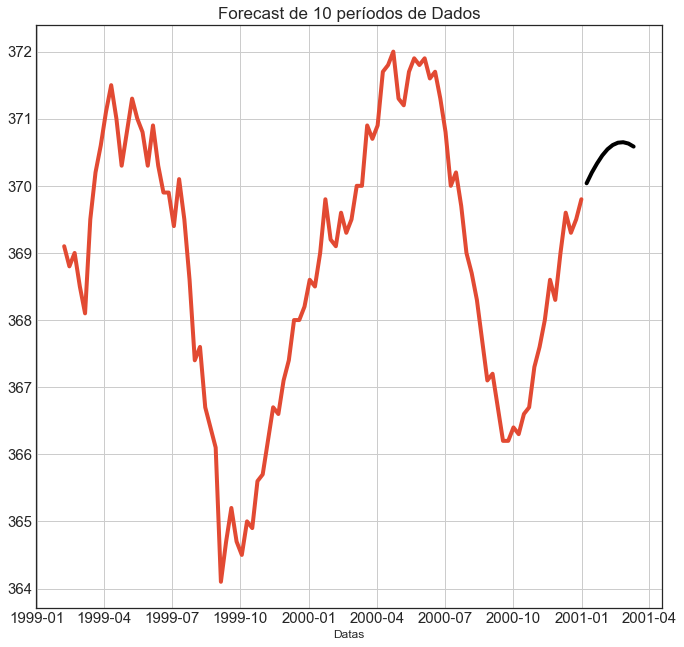

In [566]:

# Utilizando os Resultados e a Função definida Anteriormente de 
Resultados = Print_Results_TS_Model(Dados_Co2 , order_arima = (4,1,3), steps = 10, n = 100, interval = False)


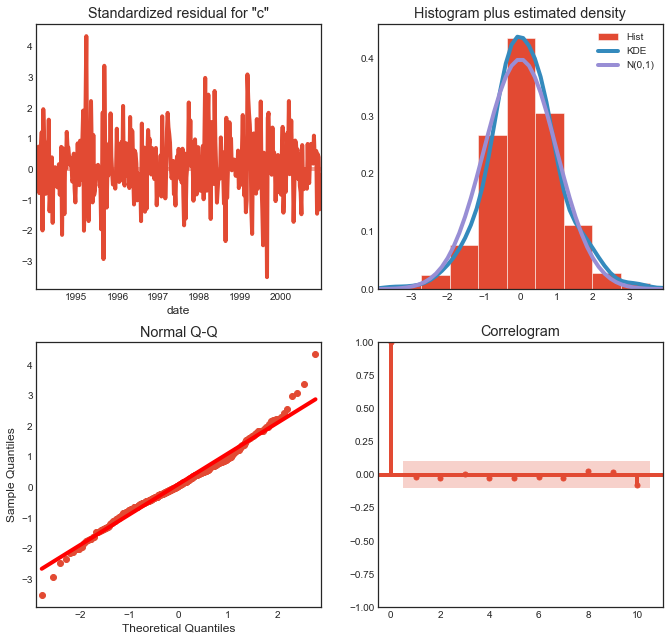

In [562]:
rcParams['figure.figsize'] = (10,10)
Resultados.plot_diagnostics()
plt.show()


A construção de modelos de Séries Temporais é um processo demorado pelo grande número de alternativas possíveis. O método de **Box-Jenkins** é uma opção recorrente para a construção de modelos não paramétricos para séries temporais univariadas. Três são os passos principais da metodologia: 

-**Identificação**: Exploração e Caracterização dos Dados. A série Temporal é Estacionária ? Quais transformações/Diferenciações devemos realizar para torná-la estacionária. Quais valores de ordem de moldelos aparentam ser mais apropriadas ?; 

-**Estimação**: Regressão dos Dados disponíveis para a determinação dos parâmetros dos modelos (modelos paramétricos do tipo SARIMAX);

-**Diagnósticos do Modelo**: O melhor modelo apresentado é analisado em função de seu ajuste e de seus resíduos. 

Estes três passos, iterativos, são o alicerce para resultar um modelo de predição apropriado. 


***SEASONAL TIME SERIES : SARIMAX MODELS***

Constituem em uma extensão dos modelos ARIMA. Possuem padrões que se repetem, assim como as temporadas/estações ('Seasons'). Séries Temporais com Sazonalidade podem ser decompostas em 3 partes: 

***Série = Tendência/Trend + Sazonalidade/Season + Resíduos***

Assim como falado anteriormente, o pacote statsmodels possui a função **seasonal_decompose** para decompor justamente essas quantidades de uma dada série temporal. 

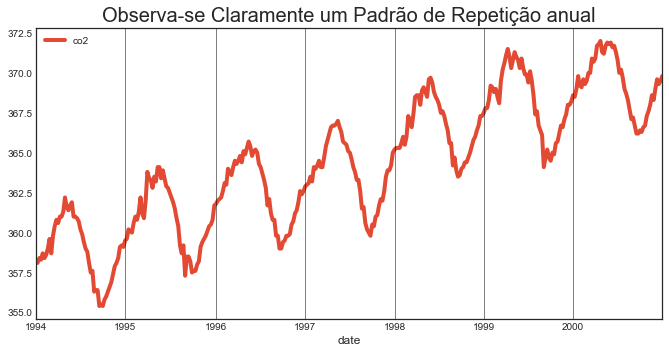

In [540]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregando e Preparando os Dados sob frequência Semanal
Dados_Co2 = pd.read_csv('CO2.csv', parse_dates = ['date'], index_col = 'date')
Dados_Co2 = Dados_Co2.resample('W').mean()['1994':'2000']

rcParams['figure.figsize'] = (10,5)
Dados_Co2.plot()

for a in range(1995,2002): 
    data = str(a)
    plt.axvline(data, color = "black", linewidth = .5)
plt.title('Observa-se Claramente um Padrão de Repetição anual',
fontdict= {'size':20})
plt.show()


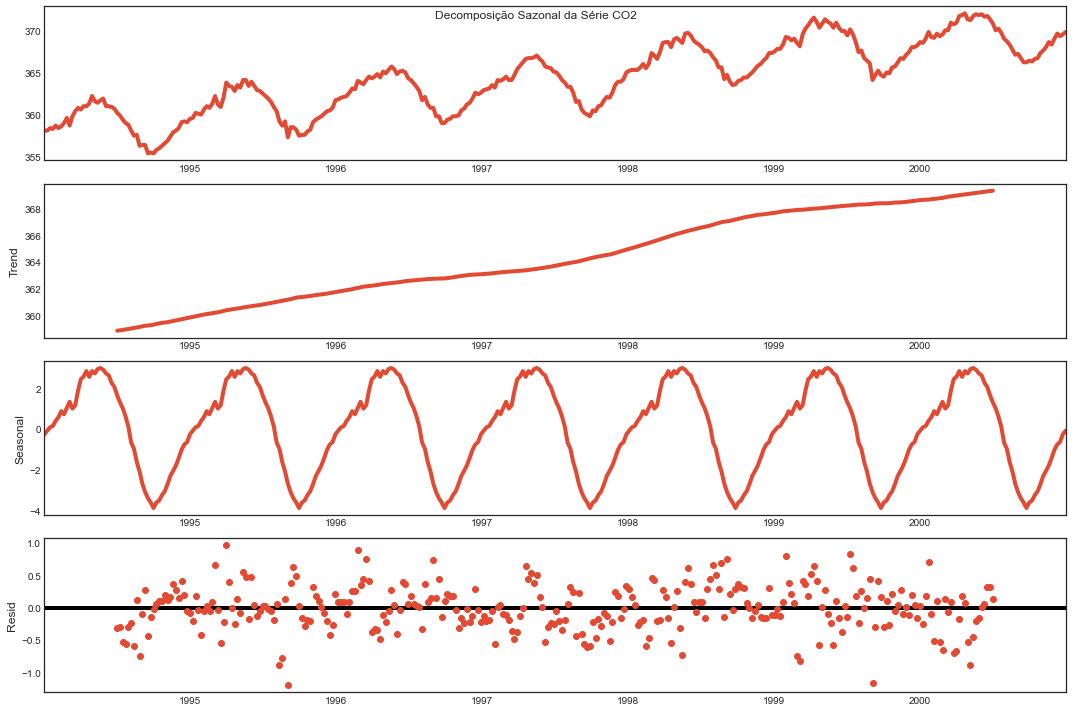

In [545]:
Decomposition = seasonal_decompose(Dados_Co2, period = 52)
rcParams['figure.figsize'] = (15,10)
Decomposition.plot()
plt.suptitle('Decomposição Sazonal da Série CO2')
plt.show()

Especificação de um modelo SARIMA: 

- Efeitos **Não Sazonais**: p,d,q (ARIMA convencional)
- Efeitos **Sazonais**: P,D,Q e S (S : Número de Períodos por Ciclo)



In [548]:
def Print_Results_SARIMAX_Model(Dataset, order_arima, order_sarima , steps = 5, Nome_Dataset = 'Dados', n = 10, interval = True):

    """
    Função Para se Ajustar um modelo ARIMA de Ordem (p,d,q) em um DataFrame de Pandas,
    dispor o sumário dos resultados e visualizar a imediata previsão de resultados. 

    Dataset: DataFrame de Pandas Contendo os Dados desejados (Index em DateTime e Coluna com Valores)
    
    order_arima: (p,d,q) = (Ordem de AR, Ordem de Diff, Ordem de MA) = (AR,I,MA)

    steps: Número de Períodos para Estimar

    Nome_Dataset: Nome que deseja-se dar aos Dados (Padrão é 'Dados')

    n: Número deperíodos da série original que serão plotados (Padrão n = 10)

    interval: Colocar ou não os intervalos de confiança de 95% no gráfico (Padrão = True)
    """
    
    model = SARIMAX(Dataset, order = order_arima, seasonal_order=order_sarima)
    results = model.fit()

    print(results.summary())

    forecast = results.get_forecast(steps = steps)
    Mean = forecast.predicted_mean
    Conf = forecast.conf_int()
    Lower = Conf.iloc[:,0]
    Upper = Conf.iloc[:,1]

    plt.plot(Dataset.iloc[len(Dataset.index) - n :len(Dataset.index)])
    plt.plot(Mean, color = 'black')
    plt.grid()
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('Datas',fontdict={'size':12})
    if interval == True: 
        plt.fill_between(Mean.index,Lower,Upper, color = 'grey', alpha = .25)
    plt.title('Forecast de ' + str(steps) + ' períodos de ' + Nome_Dataset, fontdict = {'size':17})
    plt.show()

    return results

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  366
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -240.051
Date:                Thu, 31 Mar 2022   AIC                            490.103
Time:                        16:50:23   BIC                            509.602
Sample:                    01-02-1994   HQIC                           497.852
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5596      0.090     17.264      0.000       1.383       1.737
ar.L2         -0.6339      0.089     -7.148      0.000      -0.808      -0.460
ma.L1         -1.6176      0.073    -22.256      0.0

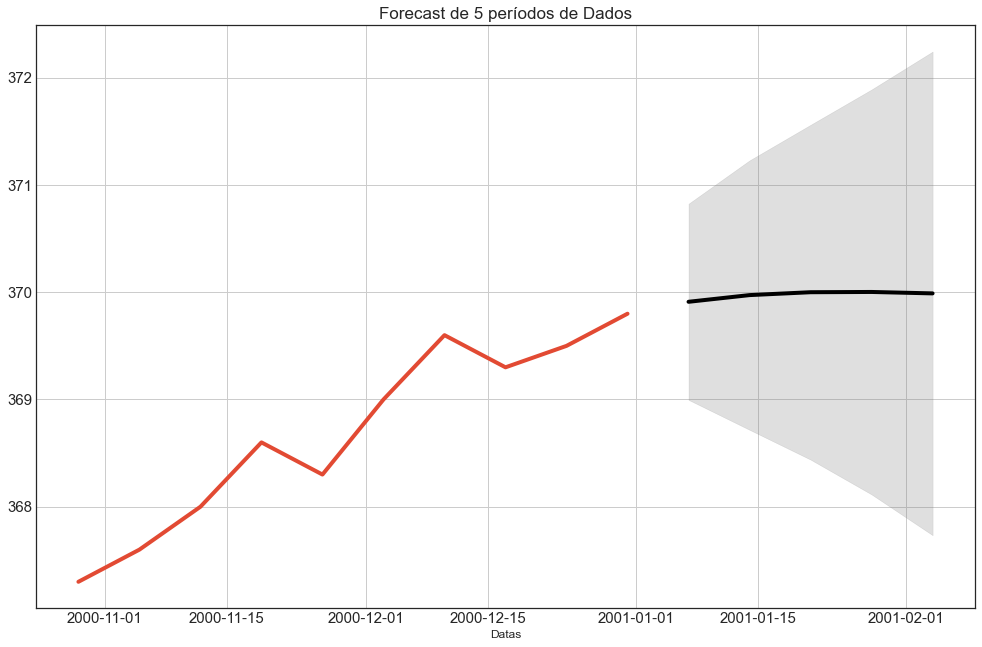

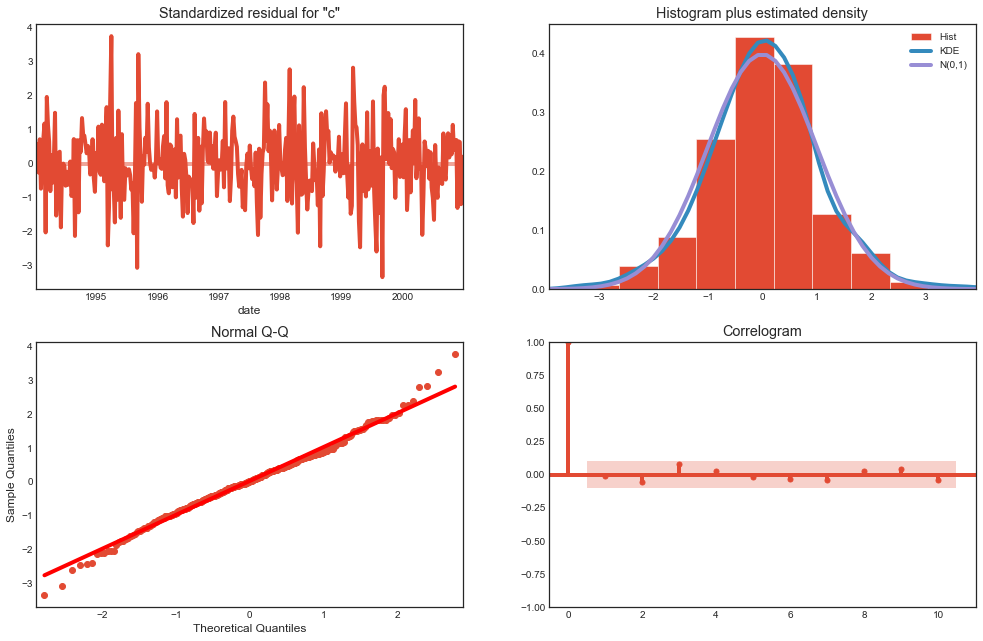

In [551]:
Print_Results_SARIMAX_Model(Dados_Co2,order_arima = (2,1,2), order_sarima= (0,0,0,52)).plot_diagnostics()
plt.show()

In [559]:
import pmdarima as pm

resultados_express = pm.auto_arima(Dados_Co2)

In [560]:
print(resultados_express.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -229.218
Date:                Thu, 31 Mar 2022   AIC                            474.436
Time:                        17:12:17   BIC                            505.636
Sample:                             0   HQIC                           486.835
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0531      0.188     10.931      0.000       1.685       2.421
ar.L2         -1.3313      0.320     -4.161      0.000      -1.958      -0.704
ar.L3          0.4135      0.128      3.225      0.0